<a href="https://colab.research.google.com/github/ReynaraEzra/Richter-Earthquake-Prediction/blob/main/Richter_Prediction_Full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predict Earthquake Damage to Building in Nepal**
## **Reynara Ezra Pratama**

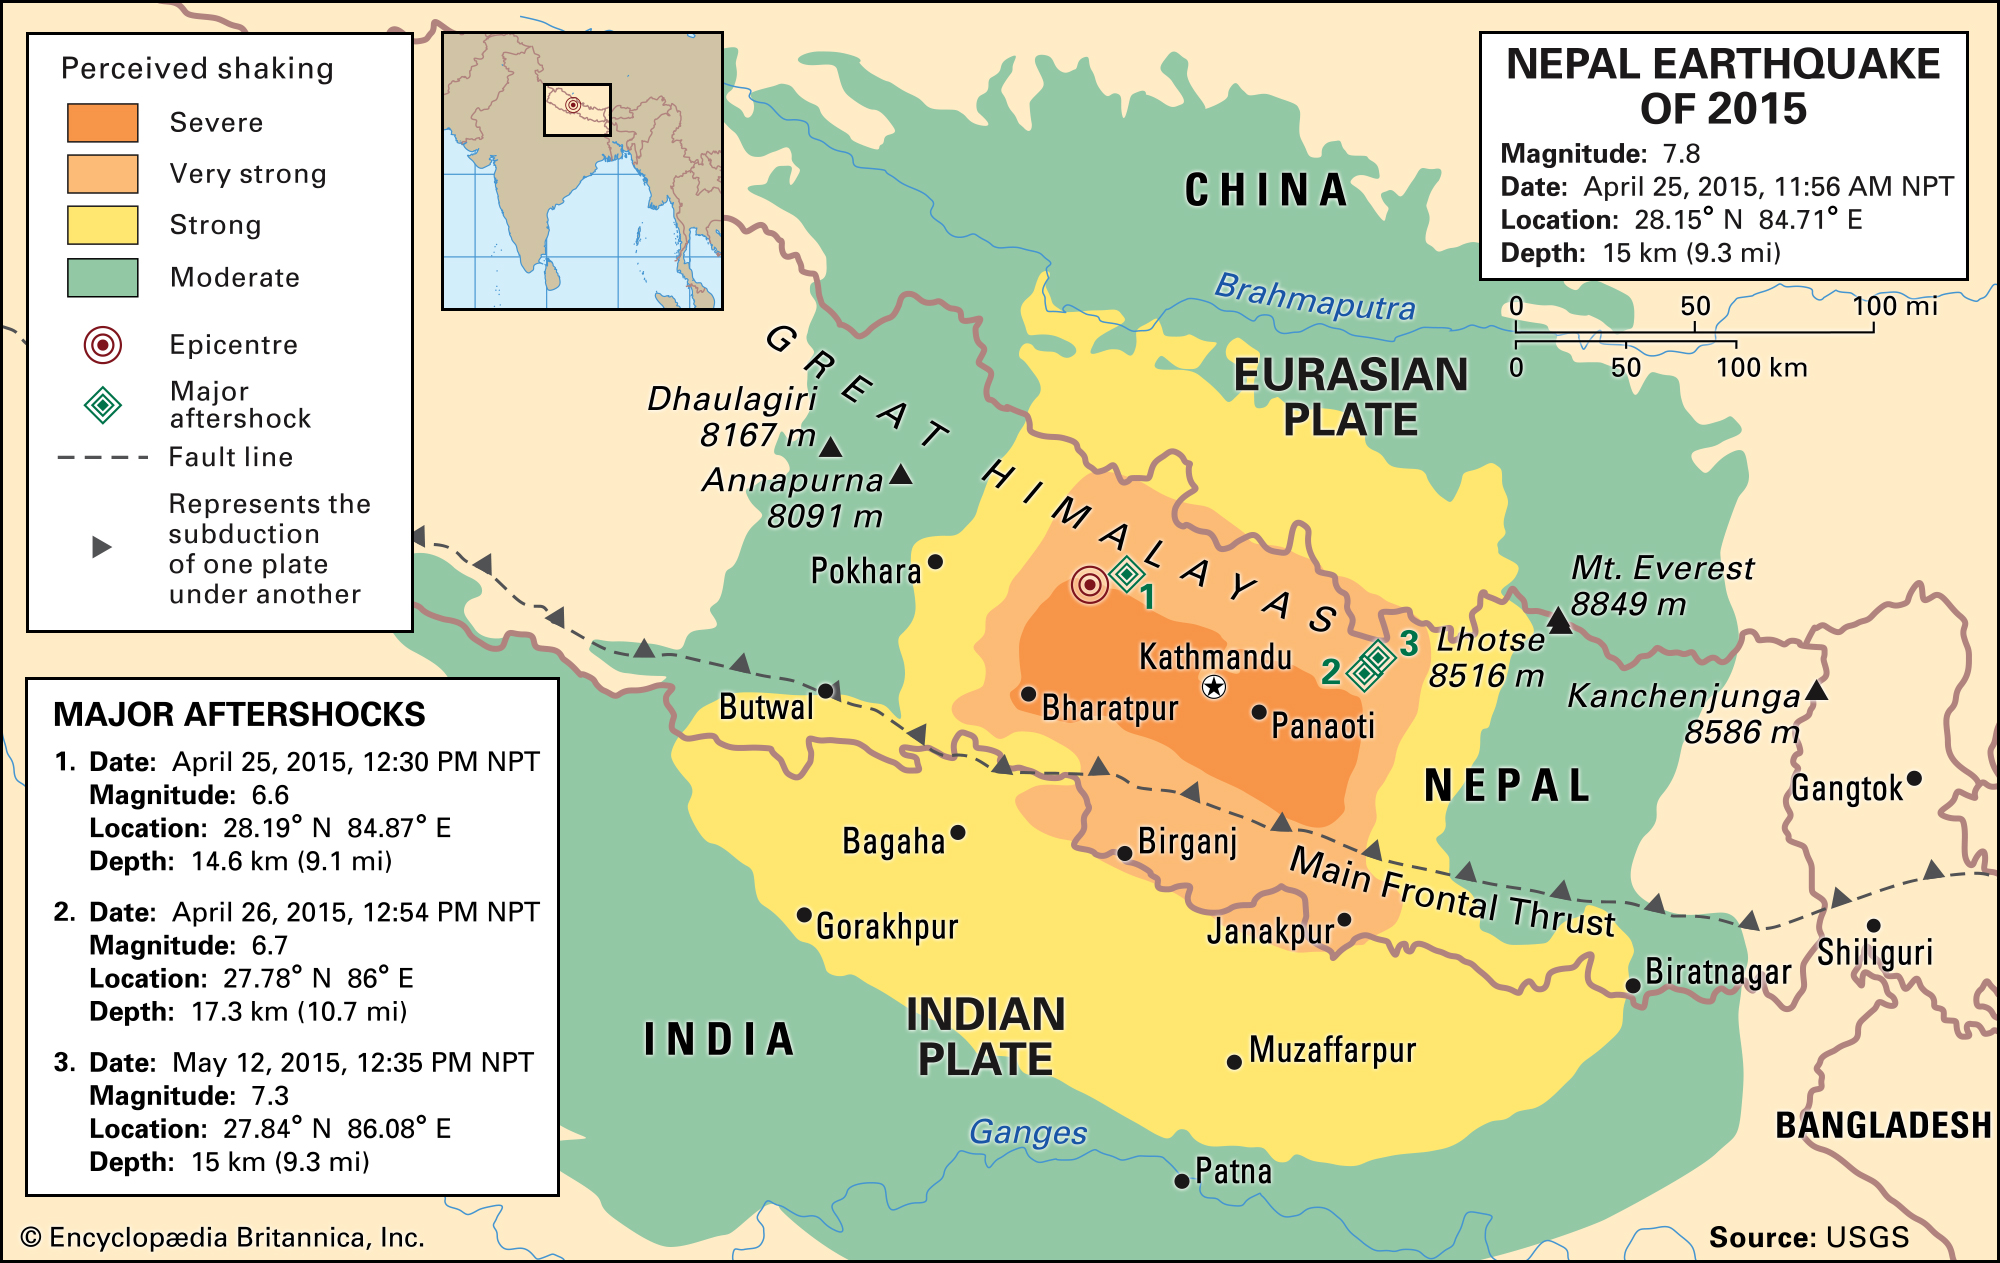

[Source : Britanica](https://cdn.britannica.com/90/182390-050-2221B963/earthquake-Map-Nepal-region-temblor-thousands-people-April-25-2015.jpg)

Pada tanggal 25 April 2015, terjadi gempa bumi berkekuatan 7,8 Skala Richter di Nepal. Pasca kejadian tersebut, dilakukan banyak penelitian dan penyelidikan di lapangan untuk melihat kerusakan yang terjadi pada bangunan yang terkena dampak dari gempa bumi tersebut. Dikarenakan jumlah bangunan dan variasi bangunan yang sangat banyak, proses penyelidikan pasca gempa menjadi sulit untuk dilakukan. Namun, dengan mengetahui deskripsi dari suatu bangunan, dapat membantu kita dalam menentukan tingkat kerusakan yang ada pada bangunan tersebut.




Data dikumpulkan melalui survei oleh [Kathmadu Living Labs](https://www.kathmandulivinglabs.org/) dan [Central Bureau of Statistics](https://cbs.gov.np/) yang bekerja di bawah Sekretariat Komisi Perencanaan Nasional Nepal. Survei ini merupakan salah satu kumpulan data pascabencana terbesar yang pernah dikumpulkan, yang berisi informasi berharga tentang dampak gempa bumi, kondisi rumah tangga, dan statistik sosio-ekonomi-demografis.

Adapun dataset pada permasalahan ini dapat dilihat pada [Earthquake Nepal 2015](https://www.drivendata.org/competitions/57/nepal-earthquake/page/134/)

## **Business Understanding**


1.   Mendapatkan gambaran bagaimana kerusakan yang ada pada bangunan yang ada di Nepal
2.   Memberikan rekomendasi berupa material atau karakteristik spesifik yang dapat digunakan dalam membangun suatu bangunan untuk mengurangi dampak kerusakan yang ditimbulkan dari gempa bumi.
3.   Memprediksi level kerusakan bangunan yang terkena dampak gempa bumi Nepal 2015.


## **Importing Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

## **Loading Dataset**

**Load Data from github**

In [ ]:
url_train_label = 'https://raw.githubusercontent.com/ReynaraEzra/Richter-Earthquake-Prediction/main/train_labels.csv'
url_train_value = 'https://raw.githubusercontent.com/ReynaraEzra/Richter-Earthquake-Prediction/main/train_values.csv'
url_test_value = 'https://raw.githubusercontent.com/ReynaraEzra/Richter-Earthquake-Prediction/main/test_values.csv'

train_label = pd.read_csv(url_train_label)
train_value = pd.read_csv(url_train_value)
test_value = pd.read_csv(url_test_value)

**Load Data from local file**

In [ ]:
# train_label = pd.read_csv("train_labels.csv")
# train_value = pd.read_csv("train_values.csv")
# test_value = pd.read_csv("test_values.csv")

# **Checking Data**

Pertama, kita akan mengecek ukuran dari data kita menggunakan attribut `.shape`

In [ ]:
print('Train Values : {}'.format(train_value.shape))
print('Train Labels : {}'.format(train_label.shape))
print('Test Values : {}'.format(test_value.shape))

Train Values : (260601, 39)
Train Labels : (260601, 2)
Test Values : (86868, 39)


In [ ]:
print('Number of Training Data : {}'.format(train_value.shape[0]))
print('Number of Testing Data : {}'.format(test_value.shape[0]))
print('Total Data : {}'.format(train_value.shape[0]+test_value.shape[0]))

Number of Training Data : 260601
Number of Testing Data : 86868
Total Data : 347469


Terlihat bahwa terdapat 260601 baris pada *Training Data* dan 86868 baris pada *Testing Data* sehingga jumlah data yang kita miliki sebesar 347469 baris. 

Akan dilihat 5 data teratas pada `train_label`, `train_value`, dan `test_value` menggunakan method `.head()`.

In [ ]:
train_label.head()

building_id  damage_grade
0       802906             3
1        28830             2
2        94947             3
3       590882             2
4       201944             3

In [ ]:
train_value.head()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       802906               6             487           12198   
1        28830               8             900            2812   
2        94947              21             363            8973   
3       590882              22             418           10694   
4       201944              11             131            1488   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    2   30                6                  5   
1                    2   10                8                  7   
2                    2   10                5                  5   
3                    2   10                6                  5   
4                    3   30                8                  9   

  land_surface_condition foundation_type  ... has_secondary_use_agriculture  \
0                      t               r  ...                             0   
1                      o               r  ...                             0   
2                      t               r  ...                             0   
3                      t               r  ...                             0   
4                      t               r  ...                             0   

  has_secondary_use_hotel has_secondary_use_rental  \
0                       0                        0   
1                       0                        0   
2                       0                        0   
3                       0                        0   
4                       0                        0   

  has_secondary_use_institution has_secondary_use_school  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   

   has_secondary_use_industry  has_secondary_use_health_post  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   has_secondary_use_gov_office  has_secondary_use_use_police  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   has_secondary_use_other  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  

[5 rows x 39 columns]

In [ ]:
test_value.head()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       300051              17             596           11307   
1        99355               6             141           11987   
2       890251              22              19           10044   
3       745817              26              39             633   
4       421793              17             289            7970   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    3   20                7                  6   
1                    2   25               13                  5   
2                    2    5                4                  5   
3                    1    0               19                  3   
4                    3   15                8                  7   

  land_surface_condition foundation_type  ... has_secondary_use_agriculture  \
0                      t               r  ...                             0   
1                      t               r  ...                             1   
2                      t               r  ...                             0   
3                      t               r  ...                             0   
4                      t               r  ...                             0   

  has_secondary_use_hotel has_secondary_use_rental  \
0                       0                        0   
1                       0                        0   
2                       0                        0   
3                       0                        1   
4                       0                        0   

  has_secondary_use_institution has_secondary_use_school  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   

   has_secondary_use_industry  has_secondary_use_health_post  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   has_secondary_use_gov_office  has_secondary_use_use_police  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   has_secondary_use_other  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  

[5 rows x 39 columns]

## **Description**

**Penjelasan Label**

Pada permasalahan ini, kita akan memprediksi variabel ordinal **`damage_grade`**, yang merepresentasikan level kerusakan dari suatu bangunan yang terdampak gempa bumi. Terdapat 3 buah level kerusakan yaitu :
*   **1** : Merepresentasikan kerusakan ringan
*   **2** : Merepresentasikan kerusakan sedang
*   **3** : Merepresentasikan kerusakan tinggi (hampir hancur seluruhnya)



**Penjelasan Feature** '

Pada feature memuat data tentang struktur bangunan dan kepemilikan legal dari bangunan tersebut. Setiap baris pada data tersebut menunjukkan suatu bangunan tertentu di wilayah yang terkena gempa.
Terdapat **39** kolom pada dataset, dimana kolom **`building_id`** adalah unik dan sebagai pengenal. Pada dataset, munculnya karakter yang sama pada kolom yang berbeda tidak menunjuk pada nilai asli yang sama. Adapun penjalasan dari **38** feature lainnya adalah :
*   **`geo_level_1_id`**, **`geo_level_2_id`**, dan **`geo_level_3_id`** (tipe:int) : Menunjukkan wilayah geografis tempat bangunan berada, dimulai dari tingkat terbesar (tingkat 1) hingga sub-kawasan spesifik (tingkat 3). Kemungkinan nilai : (level 1: 0-30), (level 2: 0-1427), (level 3: 0-12567).
*   **`count_floors_pre_eq`** (tipe:int) : Banyaknya jumlah lantai pada bangunan sebelum gempa bumi.
*   **`age`** (tipe:int) : Umur suatu bangunan dalam tahun.
*   **`area_percentage`** (tipe:int) : Luas bangunan yang dinormalisasi.
*   **`height_percentage`** (tipe:int) : Tinggi bangunan yang dinormalisasi.
*   **`land_surface_condition`** (tipe:kategorikal) : Kondisi permukaan tanah tempat bangunan tersebut dibangun. Kemungkinan nilai : `n`, `o`, `t`.
*   **`foundation_type`** (tipe:kategorikal) : Jenis pondasi yang digunakan dalam membangun bangunan. Kemungkinan nilai : `h`, `i`, `r`, `u`, `w`.
*   **`roof_type`** (tipe:kategorikal) : Jenis atap yang digunakan dalam membangun bangunan. Kemungkinan nilai : `n`, `q`, `x`.
*   **`ground_floor_type`** (tipe:kategorikal) : Jenis lantai yang digunakan pada lantai dasar bangunan. Kemungkinan nilai : `f`, `m`, `v`, `x`, `z`.
*   **`other_floor_type`** (tipe:kategorikal) : Jenis lantai yang digunakan selain pada lantai dasar bangunan. Kemungkinan nilai : `j`, `q`, `s`, `x`.
*   **`position`** (tipe:kategorikal) : Posisi dari bangunan. Kemungkinan nilai : `j`, `o`, `s`, `t`.
*   **`plan_configuration`** (tipe:kategorikal) : Konfigurasi denah bangunan. Kemungkinan nilai : `a`, `c`, `d`, `f`, `m`, `n`, `o`, `q`, `s`, `u`.
*   **`has_superstructure_adobe_mud`** (tipe:biner) : Variabel yang menunjukkan jika superstruktur terbuat dari Adobe/Mud.
*   **`has_superstructure_mud_mortar_stone`** (tipe:biner) : Variabel yang menunjukkan jika superstruktur terbuat dari Mud Mortar - Stone.
*   **`has_superstructure_stone_flag`** (tipe:biner) : Variabel yang menunjukkan jika superstruktur terbuat dari Stone.
*   **`has_superstructure_cement_mortar_stone`** (tipe:biner): Variabel yang menunjukkan jika superstruktur terbuat dari Cement Mortar - Stone.
*   **`has_superstructure_mud_mortar_brick`** (tipe:biner) : Variabel yang menunjukkan jika superstruktur terbuat dari Mud Mortar - Brick.
*   **`has_superstructure_cement_mortar_brick`** (tipe:biner) : Variabel yang menunjukkan jika superstruktur terbuat dari Cement Mortar - Brick.
*   **`has_superstructure_timber`** (tipe:biner) : Variabel yang menunjukkan jika superstruktur terbuat dari Timber.
*   **`has_superstructure_bamboor`** (tipe:biner) : Variabel yang menunjukkan jika superstruktur terbuat dari Bamboo.
*   **`has_superstructure_rc_non_engineered`** (tipe:biner) : Variabel yang menunjukkan jika superstruktur terbuat dari non-engineered reinforced concrete.
*   **`has_superstructure_rc_engineered`** (tipe:biner) : Variabel yang menunjukkan jika superstruktur terbuat dari engineered reinforced concrete.
*   **`has_superstructure_other`** (tipe:biner) : Variabel yang menunjukkan jika superstruktur terbuat dari material lain.
*   **`legal_ownership_status`** (tipe:kategorikal) : Status kepemilikan yang sah dari tanah tempat bangunan dibangun. Kemungkinan nilai :  `a`, `r`, `v`, `w`.
*   **`count_family`** (tipe:int) : Jumlah keluarga yang tinggal pada bangunan tersebut.
*   **`has_secondary_use`** (tipe:biner) : Variabel yang menunjukkan jika bangunan tersebut digunakan untuk tujuan sekunder. 
*   **`has_secondary_use_agriculture`** (tipe:biner) : Variabel yang menunjukkan jika bangunan tersebut digunakan untuk tujuan pertanian.
*   **`has_secondary_use_hotel`** (tipe:biner) : Variabel yang menunjukkan jika bangunan tersebut digunakan sebagai hotel.
*   **`has_secondary_use_rental`** (tipe:biner) : Variabel yang menunjukkan jika bangunan tersebut digunakan untuk tujuan sewa. 
*   **`has_secondary_use_institution`** (tipe:biner) : Variabel yang menunjukkan jika bangunan tersebut digunakan sebagai lokasi institusi manapun.
*   **`has_secondary_use_school`** (tipe:biner) : Variabel yang menunjukkan jika bangunan tersebut digunakan sebagai sekolah.
*   **`has_secondary_use_industry`** (tipe:biner) : Variabel yang menunjukkan jika bangunan tersebut digunakan untuk tujuan industri. 
*   **`has_secondary_use_health_post`** (tipe:biner) : Variabel yang menunjukkan jika bangunan tersebut digunakan sebagai pos kesehatan. 
*   **`has_secondary_use_gov_office`** (tipe:biner) : Variabel yang menunjukkan jika bangunan tersebut digunakan sebagai kantor pemerintahan.
*   **`has_secondary_use_use_police`** (tipe:biner) : Variabel yang menunjukkan jika bangunan tersebut digunakan sebagai kantor polisi.
*   **`has_secondary_use_other`** (tipe:biner) : Variabel yang menunjukkan jika bangunan tersebut digunakan untuk tujuan lainnya.

## **Data Preparation**

**Merge feature and label on training data**

Karena data pada *training data* kita masih terpisah pada `train_value` dan `train_label`, kita perlu menggabungkan dua data tersebut menggunakan `pd.merge()` yang secara otomatis akan menggabungkan berdasarkan kolom `building_id`.

In [ ]:
train = pd.merge(train_value, train_label)

**Check the top 5 data, bottom 5 data, and 5 random data**

In [ ]:
train.head()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       802906               6             487           12198   
1        28830               8             900            2812   
2        94947              21             363            8973   
3       590882              22             418           10694   
4       201944              11             131            1488   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    2   30                6                  5   
1                    2   10                8                  7   
2                    2   10                5                  5   
3                    2   10                6                  5   
4                    3   30                8                  9   

  land_surface_condition foundation_type  ... has_secondary_use_hotel  \
0                      t               r  ...                       0   
1                      o               r  ...                       0   
2                      t               r  ...                       0   
3                      t               r  ...                       0   
4                      t               r  ...                       0   

  has_secondary_use_rental has_secondary_use_institution  \
0                        0                             0   
1                        0                             0   
2                        0                             0   
3                        0                             0   
4                        0                             0   

  has_secondary_use_school has_secondary_use_industry  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        0                          0   
4                        0                          0   

   has_secondary_use_health_post  has_secondary_use_gov_office  \
0                              0                             0   
1                              0                             0   
2                              0                             0   
3                              0                             0   
4                              0                             0   

   has_secondary_use_use_police  has_secondary_use_other  damage_grade  
0                             0                        0             3  
1                             0                        0             2  
2                             0                        0             3  
3                             0                        0             2  
4                             0                        0             3  

[5 rows x 40 columns]

In [ ]:
train.tail()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
260596       688636              25            1335            1621   
260597       669485              17             715            2060   
260598       602512              17              51            8163   
260599       151409              26              39            1851   
260600       747594              21               9            9101   

        count_floors_pre_eq  age  area_percentage  height_percentage  \
260596                    1   55                6                  3   
260597                    2    0                6                  5   
260598                    3   55                6                  7   
260599                    2   10               14                  6   
260600                    3   10                7                  6   

       land_surface_condition foundation_type  ... has_secondary_use_hotel  \
260596                      n               r  ...                       0   
260597                      t               r  ...                       0   
260598                      t               r  ...                       0   
260599                      t               r  ...                       0   
260600                      n               r  ...                       0   

       has_secondary_use_rental has_secondary_use_institution  \
260596                        0                             0   
260597                        0                             0   
260598                        0                             0   
260599                        0                             0   
260600                        0                             0   

       has_secondary_use_school has_secondary_use_industry  \
260596                        0                          0   
260597                        0                          0   
260598                        0                          0   
260599                        0                          0   
260600                        0                          0   

        has_secondary_use_health_post  has_secondary_use_gov_office  \
260596                              0                             0   
260597                              0                             0   
260598                              0                             0   
260599                              0                             0   
260600                              0                             0   

        has_secondary_use_use_police  has_secondary_use_other  damage_grade  
260596                             0                        0             2  
260597                             0                        0             3  
260598                             0                        0             3  
260599                             0                        0             2  
260600                             0                        0             3  

[5 rows x 40 columns]

In [ ]:
train.sample(5)

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
23913        775524               8             659            7703   
252595        85085              18             977            2847   
72320        794653              17             414           11203   
46911        756701               8            1225            3947   
178042       616630              11             765           10814   

        count_floors_pre_eq  age  area_percentage  height_percentage  \
23913                     2   15                5                  5   
252595                    1   20                6                  3   
72320                     2    5               13                  7   
46911                     3   20               12                  7   
178042                    2   30                6                  6   

       land_surface_condition foundation_type  ... has_secondary_use_hotel  \
23913                       n               r  ...                       0   
252595                      t               r  ...                       0   
72320                       t               r  ...                       0   
46911                       t               r  ...                       0   
178042                      t               r  ...                       0   

       has_secondary_use_rental has_secondary_use_institution  \
23913                         0                             0   
252595                        0                             0   
72320                         0                             0   
46911                         0                             0   
178042                        0                             0   

       has_secondary_use_school has_secondary_use_industry  \
23913                         0                          0   
252595                        0                          0   
72320                         0                          0   
46911                         0                          0   
178042                        0                          0   

        has_secondary_use_health_post  has_secondary_use_gov_office  \
23913                               0                             0   
252595                              0                             0   
72320                               0                             0   
46911                               0                             0   
178042                              0                             0   

        has_secondary_use_use_police  has_secondary_use_other  damage_grade  
23913                              0                        0             3  
252595                             0                        0             3  
72320                              0                        0             2  
46911                              0                        0             2  
178042                             0                        0             3  

[5 rows x 40 columns]

**Check Null and Duplicate Data**

Untuk melihat apakah terdapat data yang kosong, kita dapat menggunakan `isnull()` dan `.sum()` untuk melihat apakah terdapat data kosong pada tiap kolom *training data*. 

In [ ]:
train.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

Tidak ada data yang kosong

In [ ]:
print('Ukuran data sebelum drop duplicate :', train.shape)
train = train.drop_duplicates(subset='building_id', keep='last')
print('Ukuran data setelah drop duplicate :', train.shape)

Ukuran data sebelum drop duplicate : (260601, 40)
Ukuran data setelah drop duplicate : (260601, 40)


Tidak ada data yang kembar pada kolom **`building_id`**

**Training Data Columns and Info**

In [ ]:
train.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

Terdapat 32 kolom pada data yang bertipe integer dan 8 kolom yang bertipe object.

**Kolom Tipe Numerik**

In [ ]:
train.select_dtypes(include=['int64']).columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'damage_grade'],
      dt

Kolom Tipe Kategorikal

In [ ]:
train.select_dtypes(include=['object']).columns

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')

**Summary Data**

In [ ]:
train.describe()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
count  2.606010e+05   260601.000000   260601.000000   260601.000000   
mean   5.256755e+05       13.900353      701.074685     6257.876148   
std    3.045450e+05        8.033617      412.710734     3646.369645   
min    4.000000e+00        0.000000        0.000000        0.000000   
25%    2.611900e+05        7.000000      350.000000     3073.000000   
50%    5.257570e+05       12.000000      702.000000     6270.000000   
75%    7.897620e+05       21.000000     1050.000000     9412.000000   
max    1.052934e+06       30.000000     1427.000000    12567.000000   

       count_floors_pre_eq            age  area_percentage  height_percentage  \
count        260601.000000  260601.000000    260601.000000      260601.000000   
mean              2.129723      26.535029         8.018051           5.434365   
std               0.727665      73.565937         4.392231           1.918418   
min               1.000000       0.000000         1.000000           2.000000   
25%               2.000000      10.000000         5.000000           4.000000   
50%               2.000000      15.000000         7.000000           5.000000   
75%               2.000000      30.000000         9.000000           6.000000   
max               9.000000     995.000000       100.000000          32.000000   

       has_superstructure_adobe_mud  has_superstructure_mud_mortar_stone  ...  \
count                 260601.000000                        260601.000000  ...   
mean                       0.088645                             0.761935  ...   
std                        0.284231                             0.425900  ...   
min                        0.000000                             0.000000  ...   
25%                        0.000000                             1.000000  ...   
50%                        0.000000                             1.000000  ...   
75%                        0.000000                             1.000000  ...   
max                        1.000000                             1.000000  ...   

       has_secondary_use_hotel  has_secondary_use_rental  \
count            260601.000000             260601.000000   
mean                  0.033626                  0.008101   
std                   0.180265                  0.089638   
min                   0.000000                  0.000000   
25%                   0.000000                  0.000000   
50%                   0.000000                  0.000000   
75%                   0.000000                  0.000000   
max                   1.000000                  1.000000   

       has_secondary_use_institution  has_secondary_use_school  \
count                  260601.000000             260601.000000   
mean                        0.000940                  0.000361   
std                         0.030647                  0.018989   
min                         0.000000                  0.000000   
25%                         0.000000                  0.000000   
50%                         0.000000                  0.000000   
75%                         0.000000                  0.000000   
max                         1.000000                  1.000000   

       has_secondary_use_industry  has_secondary_use_health_post  \
count               260601.000000                  260601.000000   
mean                     0.001071                       0.000188   
std                      0.032703                       0.013711   
min                      0.000000                       0.000000   
25%                      0.000000                       0.000000   
50%                      0.000000                       0.000000   
75%                      0.000000                       0.000000   
max                      1.000000                       1.000000   

       has_secondary_use_gov_office  has_secondary_use_use_police  \
count                 260601.000000                 260601.000000   
mean                 

Berdasarkan statistika deskriptif di atas, terlihat untuk rataan jumlah lantai bangunan adalah 2 lantai. Rata-rata umur bangunan adalah 26.53 tahun dan memiliki bangunan yang berumur sangat tua yaitu 995 tahun. Bangunan yang sangat tua ini dapat memengaruhi nilai rataan umur bangunan. Untuk rataan luas dan tinggi bangunan yaitu 8.01 $m^2$ untuk luas bangunan dan 5.43 $m$ untuk tinggi bangunan.

In [ ]:
train.describe(include='all')

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
count   2.606010e+05   260601.000000   260601.000000   260601.000000   
unique           NaN             NaN             NaN             NaN   
top              NaN             NaN             NaN             NaN   
freq             NaN             NaN             NaN             NaN   
mean    5.256755e+05       13.900353      701.074685     6257.876148   
std     3.045450e+05        8.033617      412.710734     3646.369645   
min     4.000000e+00        0.000000        0.000000        0.000000   
25%     2.611900e+05        7.000000      350.000000     3073.000000   
50%     5.257570e+05       12.000000      702.000000     6270.000000   
75%     7.897620e+05       21.000000     1050.000000     9412.000000   
max     1.052934e+06       30.000000     1427.000000    12567.000000   

        count_floors_pre_eq            age  area_percentage  \
count         260601.000000  260601.000000    260601.000000   
unique                  NaN            NaN              NaN   
top                     NaN            NaN              NaN   
freq                    NaN            NaN              NaN   
mean               2.129723      26.535029         8.018051   
std                0.727665      73.565937         4.392231   
min                1.000000       0.000000         1.000000   
25%                2.000000      10.000000         5.000000   
50%                2.000000      15.000000         7.000000   
75%                2.000000      30.000000         9.000000   
max                9.000000     995.000000       100.000000   

        height_percentage land_surface_condition foundation_type  ...  \
count       260601.000000                 260601          260601  ...   
unique                NaN                      3               5  ...   
top                   NaN                      t               r  ...   
freq                  NaN                 216757          219196  ...   
mean             5.434365                    NaN             NaN  ...   
std              1.918418                    NaN             NaN  ...   
min              2.000000                    NaN             NaN  ...   
25%              4.000000                    NaN             NaN  ...   
50%              5.000000                    NaN             NaN  ...   
75%              6.000000                    NaN             NaN  ...   
max             32.000000                    NaN             NaN  ...   

       has_secondary_use_hotel has_secondary_use_rental  \
count            260601.000000            260601.000000   
unique                     NaN                      NaN   
top                        NaN                      NaN   
freq                       NaN                      NaN   
mean                  0.033626                 0.008101   
std                   0.180265                 0.089638   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max                   1.000000                 1.000000   

       has_secondary_use_institution has_secondary_use_school  \
count                  260601.000000            260601.000000   
unique                           NaN                      NaN   
top                              NaN                      NaN   
freq                             NaN                      NaN   
mean                        0.000940                 0.000361   
std                         0.030647                 0.018989   
min                         0.000000                 0.000000   
25%                         0.000000                 0.000000   
50%                         0.000000                 0.000000   
75%                         0.000000                 0.000000   
max                         1.000000                 1.000000   

       has_secondary

# **Exploratory Data Analysis**

## **Plot Label Data**

In [ ]:
train['damage_grade'] = train['damage_grade'].astype('category')

In [ ]:
train['damage_grade'] = train['damage_grade'].replace({1:'Low', 2:'Medium', 3:'High'})

In [ ]:
train['damage_grade'].unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [ ]:
train['damage_grade'].value_counts()

Medium    148259
High       87218
Low        25124
Name: damage_grade, dtype: int64

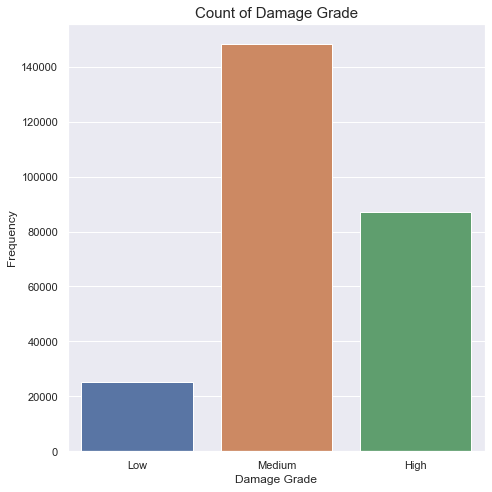

In [ ]:
plt.figure(figsize=(7,7))

sns.set_theme()
sns.countplot(train['damage_grade'], order=['Low', 'Medium', 'High'])
plt.xlabel('Damage Grade', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Count of Damage Grade', fontsize=15)
plt.tight_layout()
plt.show()

In [ ]:
print('Jumlah Bangunan dengan tingkat kerusakan rendah : {}'.format(sum(train['damage_grade']=='Low')))
print('Jumlah Bangunan dengan tingkat kerusakan menengah : {}'.format(sum(train['damage_grade']=='Medium')))
print('Jumlah Bangunan dengan tingkat kerusakan tinggi : {}'.format(sum(train['damage_grade']=='High')))
print('')
print('Persentase Bangunan dengan tingkat kerusakan rendah : {:.2f}%'.format(sum(train['damage_grade']=='Low')/train.shape[0]*100))
print('Persentase Bangunan dengan tingkat kerusakan menengah : {:.2f}%'.format(sum(train['damage_grade']=='Medium')/train.shape[0]*100))
print('Persentase Bangunan dengan tingkat kerusakan tinggi : {:.2f}%'.format(sum(train['damage_grade']=='High')/train.shape[0]*100))

Jumlah Bangunan dengan tingkat kerusakan rendah : 25124
Jumlah Bangunan dengan tingkat kerusakan menengah : 148259
Jumlah Bangunan dengan tingkat kerusakan tinggi : 87218

Persentase Bangunan dengan tingkat kerusakan rendah : 9.64%
Persentase Bangunan dengan tingkat kerusakan menengah : 56.89%
Persentase Bangunan dengan tingkat kerusakan tinggi : 33.47%


Berdasarkan gambar di atas, terlihat bahwa jumlah bangunan dengan tingkat kerusakan menengah adalah yang paling banyak yaitu sebesar 56.89% diikuti oleh bangunan dengan tingkat kerusakan tinggi sebesar 33.47% dan terakhir bangunan dengan tingkat kerusakan rendah sebesar 9.64%.

## **Check Between Feature and Label**

## **Univariate Analysis**

## **Geo Level and Damage Grade**

In [ ]:
def plot_box(data, col_y, y_label, title, col_x = 'damage_grade', x_label = 'Damage Grade'):
    plt.figure(figsize=(7,7))
    sns.set_theme()
    sns.boxplot(data[col_x], data[col_y], order=['Low', 'Medium', 'High'])
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.title(title, fontsize=14)
    plt.show()

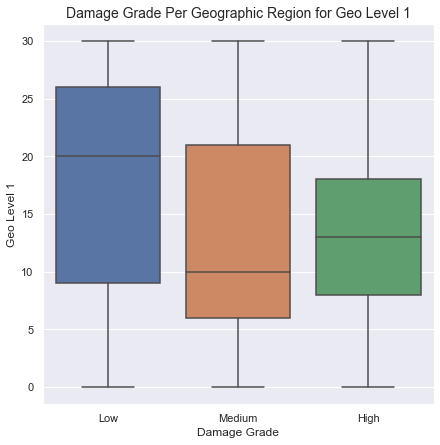

In [ ]:
plot_box(train, 'geo_level_1_id', 'Geo Level 1','Damage Grade Per Geographic Region for Geo Level 1')

Berdasarkan gambar di atas, bangunan yang berada pada tingkat geografis level 1 memiliki tingkat kerusakan rendah, menengah, dan tinggi. Pada tingkat geografis 1, sebanyak 75% bangunan yang mengalami tingkat kerusakan rendah berada pada tingkat geografis level 1 pada nilai 9 hingga 26, nilai 6 hingga 21 untuk tingkat kerusakan menengah, dan nilai 8 hingga 18 untuk tingkat kerusakan tinggi. Dikarenakan tingkat geografis level 1 adalah yang paling luas dibandingkan tingkat geografis yang lain, terlihat bahwa bangunan yang berada pada tingkat geografis level 1 pada nilai 8 hingga 18 lebih mengalami kerusakan dibandingkan pada nilai lainnya.

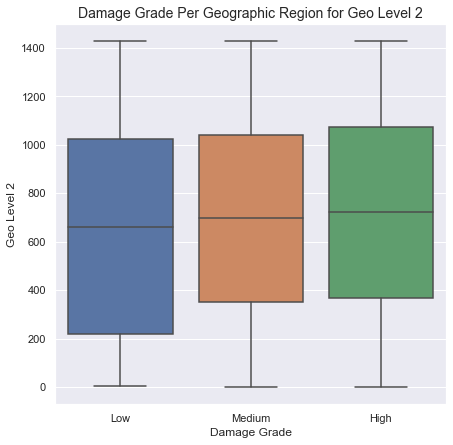

In [ ]:
plot_box(train, 'geo_level_2_id', 'Geo Level 2','Damage Grade Per Geographic Region for Geo Level 2')

Berdasarkan gambar di atas, bangunan yang berada pada tingkat geografis level 2 memiliki tingkat kerusakan rendah, menengah, dan tinggi. Pada tingkat geografis 2, sebanyak 75% bangunan yang mengalami tingkat kerusakan rendah berada pada tingkat geografis level 2 pada nilai 200 hingga 1100, nilai 350 hingga 1100 untuk tingkat kerusakan menengah, dan nilai 350 hingga 1100 untuk tingkat kerusakan tinggi. Dikarenakan tingkat geografis level 2 adalah tingkat geografis yang lebih sempit dibandingkan tingkat geografis 1, terlihat bahwa persebaran kerusaan bangunan yang berada pada tingkat geografis level 2 lebih mirip untuk ketiga tingkat kerusakan. 

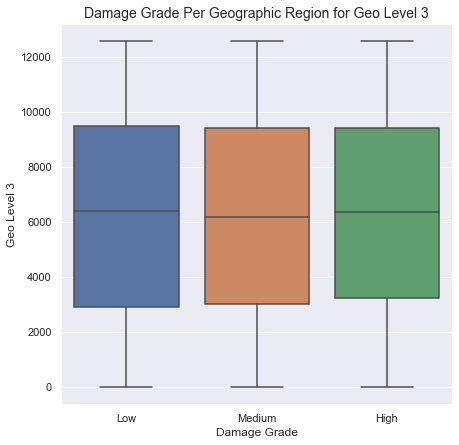

In [ ]:
plot_box(train, 'geo_level_3_id', 'Geo Level 3','Damage Grade Per Geographic Region for Geo Level 3')

Berdasarkan gambar di atas, bangunan yang berada pada tingkat geografis level 2 memiliki tingkat kerusakan rendah, menengah, dan tinggi. Dikarenakan tingkat geografis level 3 adalah tingkat geografis yang lebih sempit dibandingkan tingkat geografis lainnya, bangunan pada tingkat geografis 3 memiliki tingkat kerusakan yang hampir sama pada semua nilainya.

## **Number of Floor and Damage Grade**

In [ ]:
train['count_floors_pre_eq'].value_counts()

2    156623
3     55617
1     40441
4      5424
5      2246
6       209
7        39
8         1
9         1
Name: count_floors_pre_eq, dtype: int64

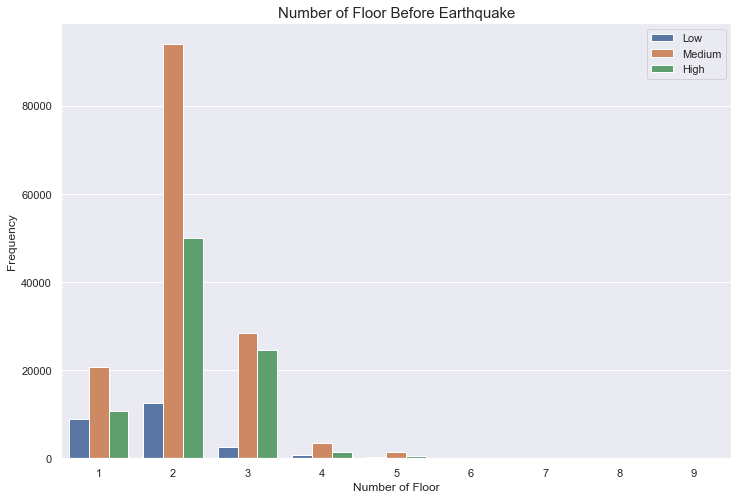

In [ ]:
plt.figure(figsize=(12,8))

sns.countplot(train['count_floors_pre_eq'], hue=train['damage_grade'], hue_order=['Low', 'Medium', 'High'])
plt.xlabel('Number of Floor', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Number of Floor Before Earthquake', fontsize=15)
plt.legend(loc='upper right')
plt.show()

Bangunan di Nepal yang mengalami kerusakan akibat gempa mempunyai jumlah lantai yang beragam dimulai dari bangunan dengan 1 lantai hingga 9 lantai. Adapun 3 jenis bangunan berdasarkan jumlah lantainya adalah bangunan 2 lantai, kemudian diikuti dengan 3 lantai dan 1 lantai. Diamati bahwa untuk bangunan yang memiliki 2 lantai mangalami tingkat kerusakan menengah, kemudian diikuti dengan tingkat kerusakan tinggi dan tingkat kerusakan rendah. Hal ini juga berlaku untuk bangunan yang memiliki 3 lantai dan 1 lantai.

## **Age and Damage Grade**

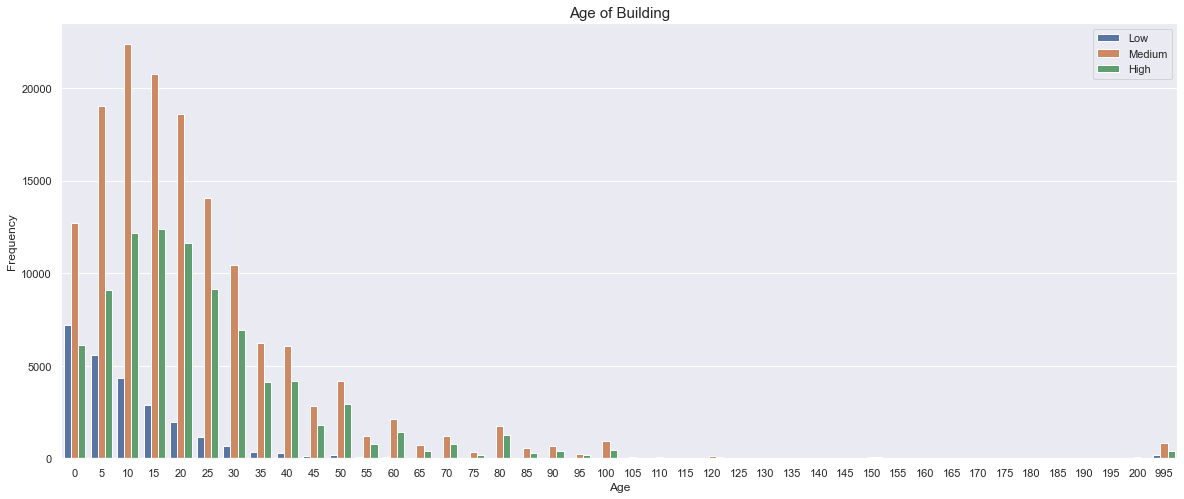

In [ ]:
plt.figure(figsize=(20,8))

sns.countplot(train['age'], hue=train['damage_grade'], hue_order=['Low', 'Medium', 'High'])
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Age of Building', fontsize=15)
plt.legend(loc='upper right')
plt.show()

Pada gambar di atas, terlihat bahwa persebaran umur bangunan adalah pada rentang 0-200 tahun kemudian dilanjut dengan umur bangunan lebih dari 950 tahun. Oleh karena itu, akan dibagi plot di atas ke dalam 4 buah segmen yaitu pada range 0-50 tahun, 51-100 tahun, 101-150 tahun, dan lebih dari 150 tahun.

**Segment 1 (0 to 50 years old building)**

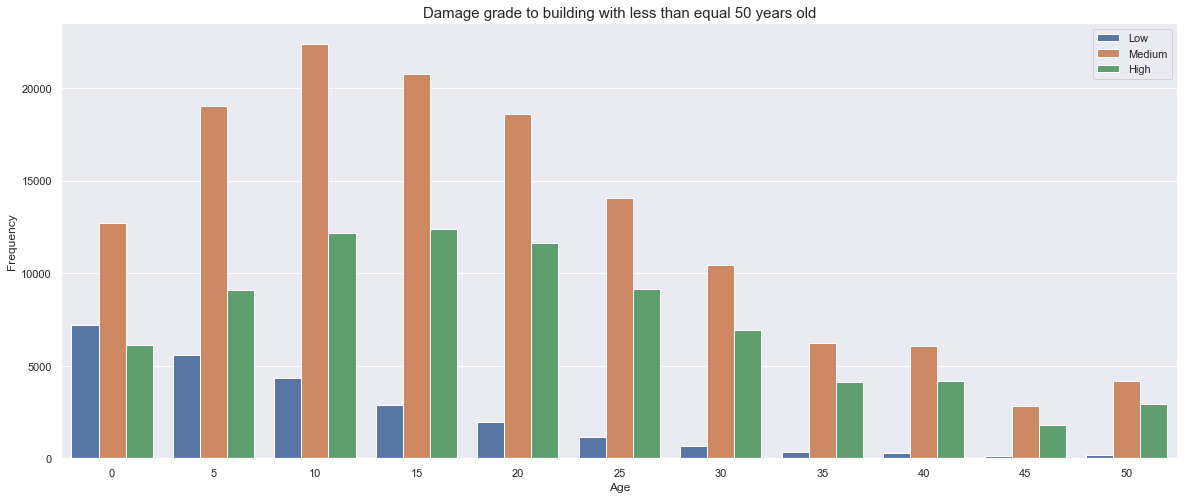

In [ ]:
plt.figure(figsize=(20,8))

segment_1_age = train[train['age']<=50]
sns.countplot(segment_1_age['age'], hue=segment_1_age['damage_grade'], hue_order=['Low', 'Medium', 'High'])
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Damage grade to building with less than equal 50 years old', fontsize=15)
plt.legend(loc='upper right')
plt.show()

Berdasarkan gambar di atas, terlihat bahwa pada umur bangunan antara 0 hingga 50 tahun, tingkat kerusakan bangunan paling banyak adalah tingkat kerusakan sedang. Pada umur bangunan antara 0 hingga 40 tahun terlihat bangunan dengan tingkat kerusakan ringan mengalami penurunan.

**Segment 2 (51 to 100 years old building)**

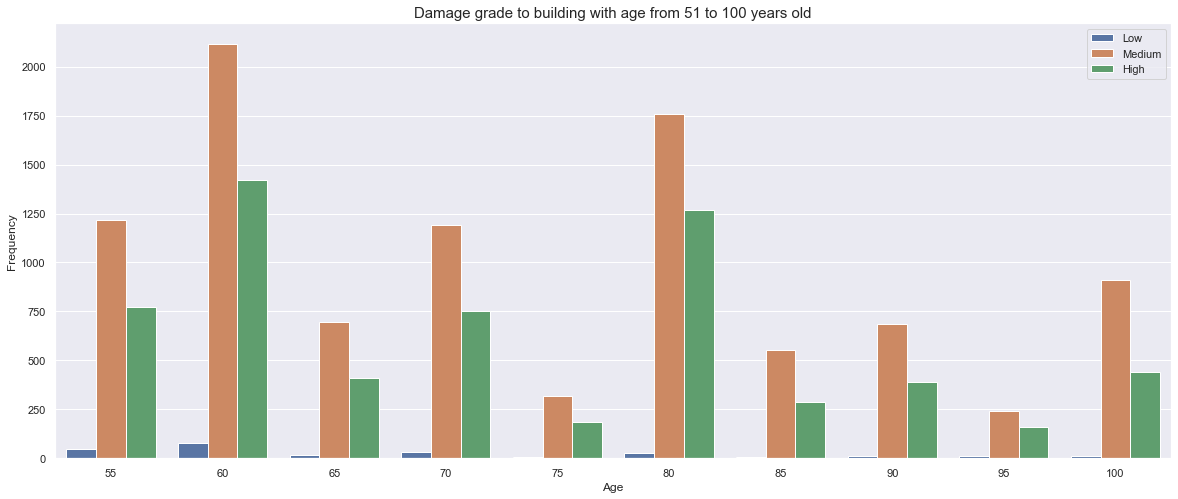

In [ ]:
plt.figure(figsize=(20,8))

segment_2_age = train[(train['age']>50) & (train['age']<=100)]
sns.countplot(segment_2_age['age'], hue=segment_2_age['damage_grade'], hue_order=['Low', 'Medium', 'High'])
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Damage grade to building with age from 51 to 100 years old', fontsize=15)
plt.legend(loc='upper right')
plt.show()

Berdasarkan gambar di atas, terlihat bahwa pada umur bangunan antara 51 hingga 100 tahun, tingkat kerusakan bangunan paling banyak adalah tingkat kerusakan sedang. Pada umur bangunan antara 51 hingga 100, hanya ada sedikit bangunan yang mengalami tingkat kerusakan ringan.

**Segment 3 (101 to 150 years old building)**

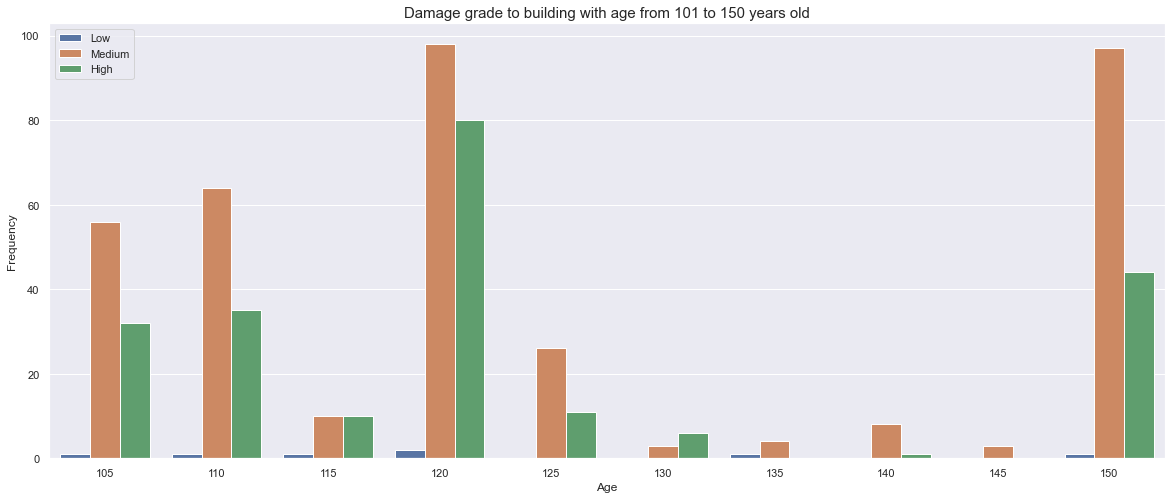

In [ ]:
plt.figure(figsize=(20,8))

segment_3_age = train[(train['age']>100) & (train['age']<=150)]
sns.countplot(segment_3_age['age'], hue=segment_3_age['damage_grade'], hue_order=['Low', 'Medium', 'High'])
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Damage grade to building with age from 101 to 150 years old', fontsize=15)
plt.legend(loc='upper left')
plt.show()

Beberapa bangunan yang mempunyai umur antara 101 hingga 150 tahun mengalami tingkat kerusakan yang didominasi tingkat kerusakan mengengah dan tinggi.

**Segment 4 (150 to 1000 years old building)**

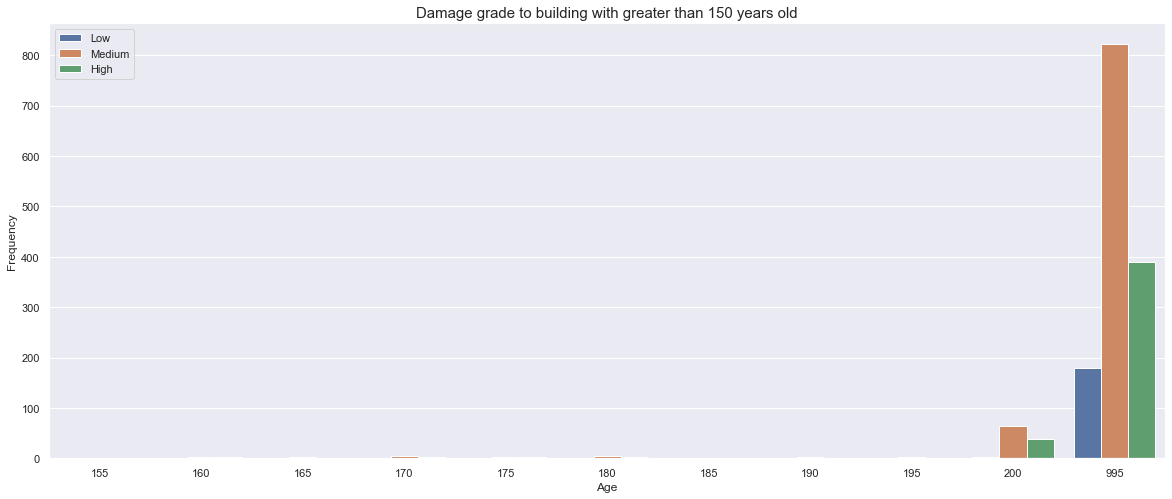

In [ ]:
plt.figure(figsize=(20,8))

segment_4_age = train[train['age']>150]
sns.countplot(segment_4_age['age'], hue=segment_4_age['damage_grade'], hue_order=['Low', 'Medium', 'High'])
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Damage grade to building with greater than 150 years old', fontsize=15)
plt.legend(loc='upper left')
plt.show()

Berdasarkan gambar di atas, terdapat bangunan yang mempunyai umur lebih dari 200 tahun dan mengalami tingkat kerusakan baik itu rendah, menengah, dan tinggi. Terdapat bangunan yang mempunyai umur sangat tua yaitu 995 tahun dan banyak diantaranya yang mengalami tingkat kerusakan menengah.

## **Area Percentage and Damage Grade**

In [ ]:
train['area_percentage'].unique()

array([  6,   8,   5,   9,   3,  13,   7,   4,  12,  16,  11,  27,  10,
        15,  14,  17,  21,  37,  19,   2,  28,  38,  56,   1,  20,  24,
        34,  26,  18,  31,  25,  23,  22,  32,  47,  36,  40,  29,  42,
        55,  35,  39, 100,  50,  51,  43,  30,  62,  85,  33,  45,  52,
        57,  49,  67,  66,  54,  75,  65,  58,  48,  64,  63,  46,  59,
        86,  78,  41,  44,  61,  70,  77,  73,  72,  53,  60,  84,  83,
        76,  96,  80,  90,  82,  69], dtype=int64)

In [ ]:
train['area_percentage'].value_counts()

6      42013
7      36752
5      32724
8      28445
9      22199
       ...  
55         1
80         1
90         1
82         1
100        1
Name: area_percentage, Length: 84, dtype: int64

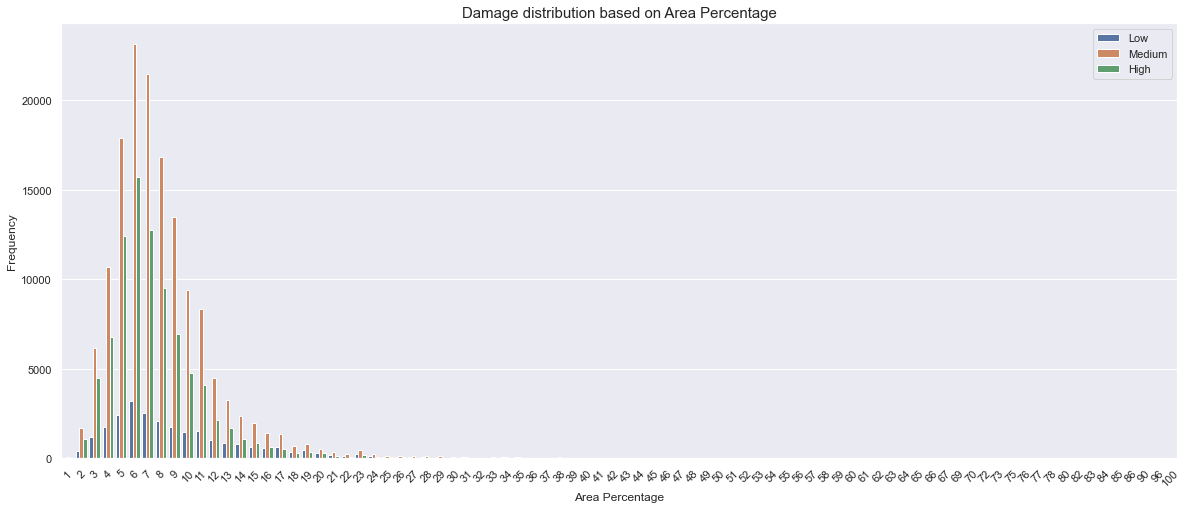

In [ ]:
plt.figure(figsize=(20,8))

sns.countplot(train['area_percentage'], hue=train['damage_grade'], hue_order=['Low', 'Medium', 'High'])
plt.xlabel('Area Percentage', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Frequency', fontsize=12)
plt.title('Damage distribution based on Area Percentage', fontsize=15)
plt.legend(loc='upper right')
plt.show()

Terlihat bahwa banyak bangunan yang ada di Nepal memiliki luas area atau *area percentage* dari 1 hingga 20 $m^2$ dan mayoritas mengalami tingkat kerusakan menengah akibat gempa.

## **Height Percentage and Damage Grade**

In [ ]:
train['height_percentage'].unique()

array([ 5,  7,  9,  4,  6,  3, 10,  8,  2, 32, 12, 11, 13, 16, 15, 18, 26,
       17, 19, 14, 20, 23, 21, 25, 24, 28, 31], dtype=int64)

In [ ]:
train['height_percentage'].value_counts()

5     78513
6     46477
4     37763
7     35465
3     25957
8     13902
2      9305
9      5376
10     4492
11      917
12      907
13      759
15      292
16      179
32       75
18       71
14       66
20       33
21       13
23       11
17        9
19        7
24        4
25        3
26        2
28        2
31        1
Name: height_percentage, dtype: int64

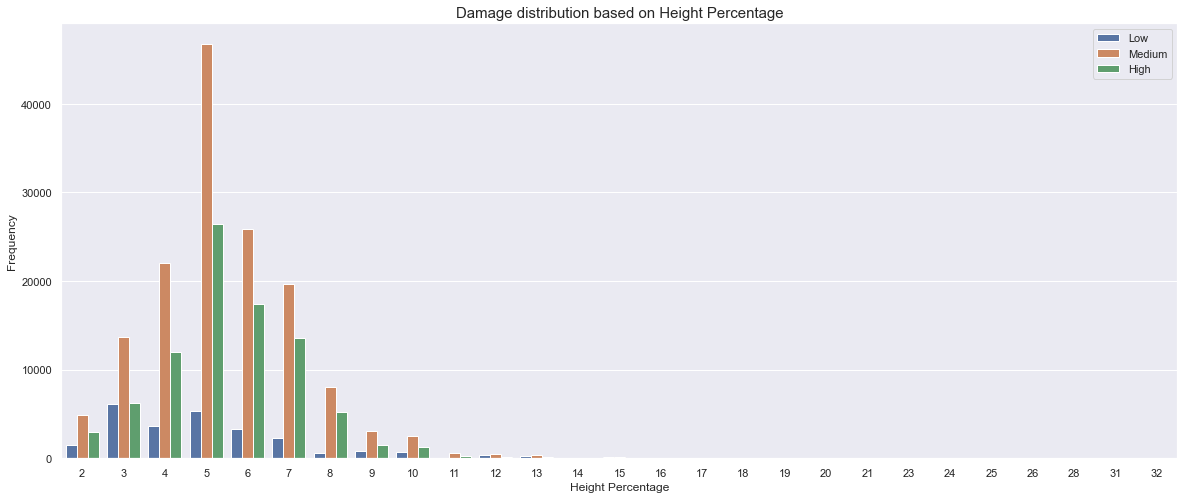

In [ ]:
plt.figure(figsize=(20,8))

sns.countplot(train['height_percentage'], hue=train['damage_grade'], hue_order=['Low', 'Medium', 'High'])
plt.xlabel('Height Percentage', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Damage distribution based on Height Percentage', fontsize=15)
plt.legend(loc='upper right')
plt.show()

Untuk tinggi bangunan sendiri berada pada rentang 2 hingga 10 $m$ dan mengalami tingkat kerusakan menengah akibat gempa.

## **Count Families and Damage Grade**

In [ ]:
train['count_families'].value_counts()

1    226115
0     20862
2     11294
3      1802
4       389
5       104
6        22
7         7
9         4
8         2
Name: count_families, dtype: int64

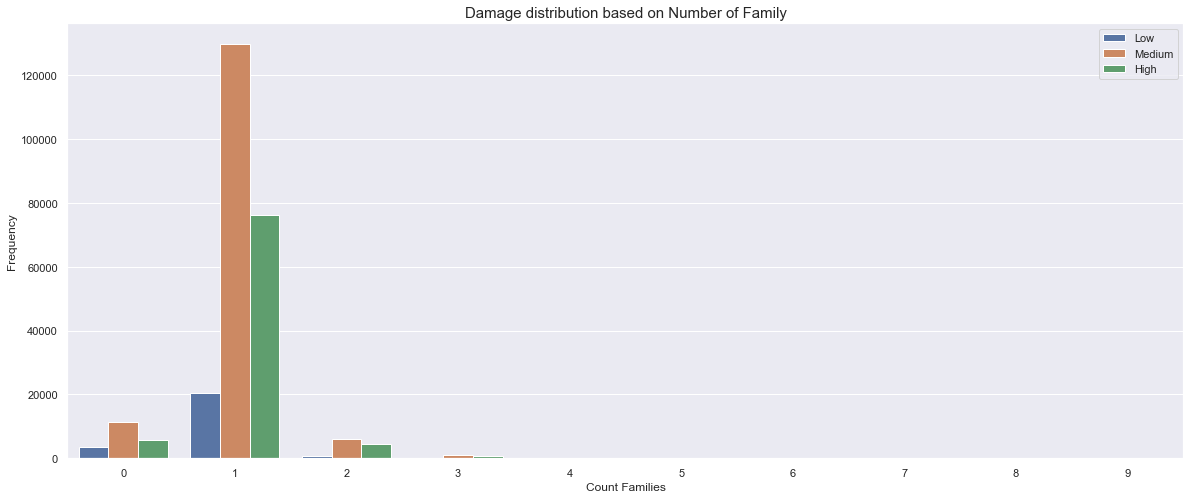

In [ ]:
plt.figure(figsize=(20,8))

sns.countplot(train['count_families'], hue=train['damage_grade'], hue_order=['Low', 'Medium', 'High'])
plt.xlabel('Count Families', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Damage distribution based on Number of Family', fontsize=15)
plt.legend(loc='upper right')
plt.show()

Mayoritas bangunan di Nepal yang terkena dampak dari gempa bumi dihuni oleh 0-2 orang. Untuk bangunan dengan 0 orang menyatakan bahwa bangunan tersebut bukanlah bangunan pribadi melainkan fasilitas umum yang tidak ditinggali untuk kehidupan sehari-hari.

## **Categorical Feature and Damage Grade**

In [ ]:
def cat_plot(data, col_x, x_label, col_y = 'damage_grade'):
    plt.figure(figsize=(10,4))

    sns.countplot(data[col_x], hue=data[col_y], hue_order=['Low', 'Medium', 'High'])
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title('Damage distribution based on {}'.format(x_label), fontsize=15)
    plt.legend(loc='upper right')
    plt.show()

**Land Surface Condition and Damage Grade**

In [ ]:
train['land_surface_condition'].value_counts()

t    216757
n     35528
o      8316
Name: land_surface_condition, dtype: int64

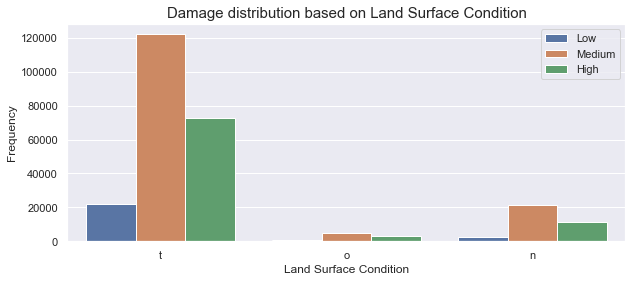

In [ ]:
cat_plot(train, 'land_surface_condition', 'Land Surface Condition')

Berdasarkan gambar di atas, bangunan yang ada di nepal mempunyai kondisi permukaan tanah bangunan `t` dan permukaan tanah  ini memiliki pengaruh terhadap tingkat kerusakan yang terjadi pada bangunan.

**Foundation Type and Damage Grade**

In [ ]:
train['foundation_type'].value_counts()

r    219196
w     15118
u     14260
i     10579
h      1448
Name: foundation_type, dtype: int64

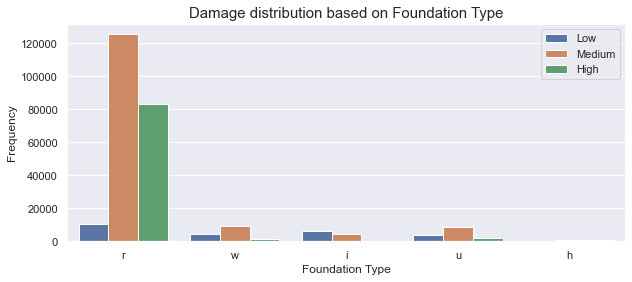

In [ ]:
cat_plot(train, 'foundation_type', 'Foundation Type')

Berdasarkan gambar di atas, bangunan dengan tipe pondasi `r` memiliki jumlah terbanyak dan memiliki pengaruh terhadap tingkat kerusakan yang terjadi pada bangunan.

**Roof Type and Damage Grade**

In [ ]:
train['roof_type'].value_counts()

n    182842
q     61576
x     16183
Name: roof_type, dtype: int64

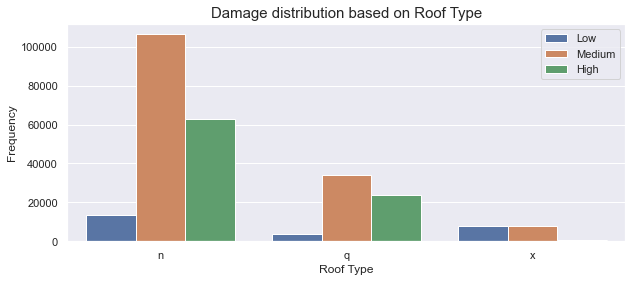

In [ ]:
cat_plot(train, 'roof_type', 'Roof Type')

**Ground Floor Type and Damage Grade**

In [ ]:
train['ground_floor_type'].value_counts()

f    209619
x     24877
v     24593
z      1004
m       508
Name: ground_floor_type, dtype: int64

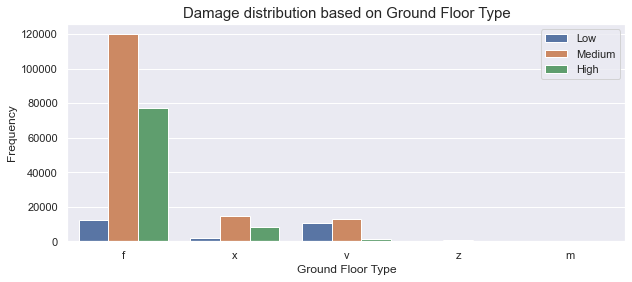

In [ ]:
cat_plot(train, 'ground_floor_type', 'Ground Floor Type')

Bangunan dengan jenis lantai yang digunakan pada lantai dasar bangunan bertipe `f` memiliki jumlah terbanyak dan memiliki pengaruh terhadap tingkat kerusakan yang terjadi pada bangunan.

**Other Floor Type and Damage Grade**

In [ ]:
train['other_floor_type'].value_counts()

q    165282
x     43448
j     39843
s     12028
Name: other_floor_type, dtype: int64

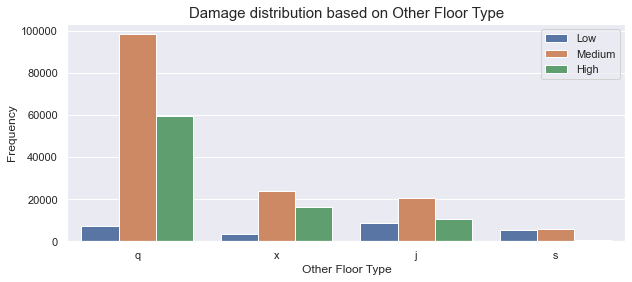

In [ ]:
cat_plot(train, 'other_floor_type', 'Other Floor Type')

Bangunan dengan jenis lantai yang digunakan pada lantai lain banyak menggunakan lantai bertipe `q` dan mayoritas diantaranya mengalami tingkat kerusakan menengah dan tinggi.

**Position and Damage Grade**

In [ ]:
train['position'].value_counts()

s    202090
t     42896
j     13282
o      2333
Name: position, dtype: int64

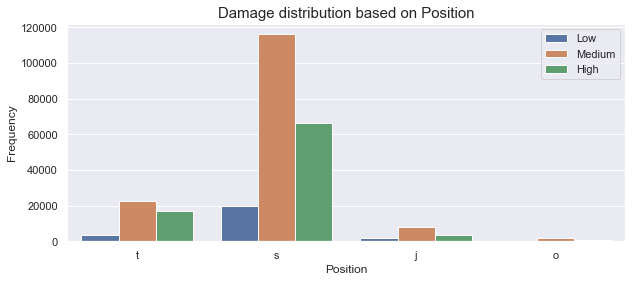

In [ ]:
cat_plot(train, 'position', 'Position')

Bangunan yang berada di Nepal kebanyakan menggunakan posisi bertipe `s` dan mayoritas mengalami tingkat kerusakan menengah akibat gempa.

**Plan Configuration and Damage Grade**

In [ ]:
train['plan_configuration'].value_counts()

d    250072
q      5692
u      3649
s       346
c       325
a       252
o       159
m        46
n        38
f        22
Name: plan_configuration, dtype: int64

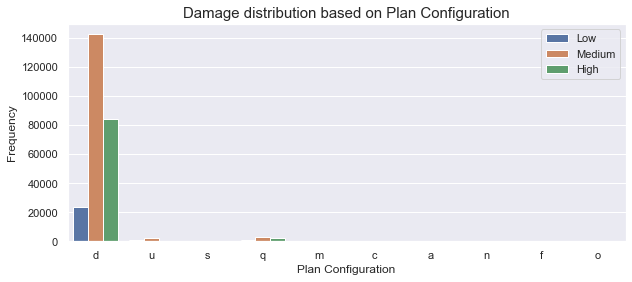

In [ ]:
cat_plot(train, 'plan_configuration', 'Plan Configuration')

*Plan configuration* yang ada pada bangunan di Nepal didominasi `d` dan banyak diantaranya yang mengalami tingkat kerusakan menengah.

**Legal Ownership Status**

In [ ]:
train['legal_ownership_status'].value_counts()

v    250939
a      5512
w      2677
r      1473
Name: legal_ownership_status, dtype: int64

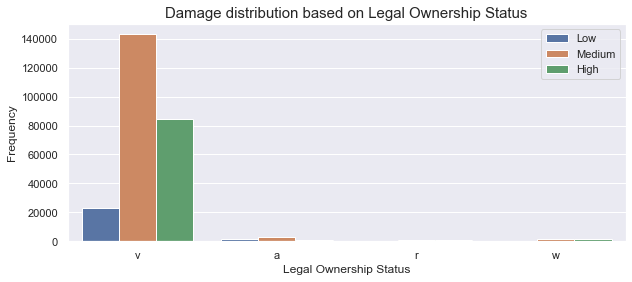

In [ ]:
cat_plot(train, 'legal_ownership_status', 'Legal Ownership Status')

Status kepemilikan bangunan didominasi oleh `v` dan banyak diantaranya yang mengalami tingkat kerusakan menengah.

## **Numerical Feature (Binary) and Damage Grade**

In [ ]:
def count_plot(data, col_x, x_label, title, col_y = 'damage_grade'):
    plt.figure(figsize=(10,4))

    p = sns.countplot(data[col_x], hue=data[col_y], hue_order=['Low', 'Medium', 'High'])
    plt.xlabel(x_label, fontsize=12)
    p.set_xticklabels(['No', 'Yes'])
    plt.ylabel('Frequency', fontsize=12)
    plt.title('Damage distribution that has {}'.format(title), fontsize=15)
    plt.legend(loc='upper right')
    plt.show()

**Has Superstructure Adobe Mud**

In [ ]:
train['has_superstructure_adobe_mud'].value_counts()

0    237500
1     23101
Name: has_superstructure_adobe_mud, dtype: int64

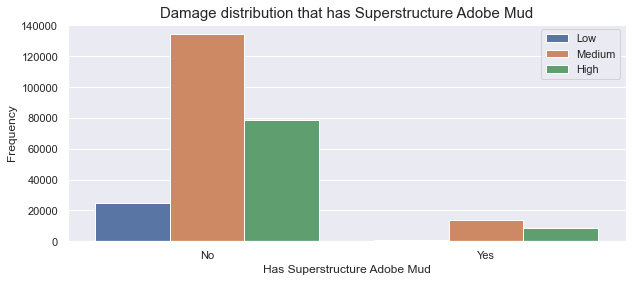

In [ ]:
count_plot(train, 'has_superstructure_adobe_mud', 'Has Superstructure Adobe Mud', 'Superstructure Adobe Mud')

**Has Superstructure Mud Mortar Stone**

In [ ]:
train['has_superstructure_mud_mortar_stone'].value_counts()

1    198561
0     62040
Name: has_superstructure_mud_mortar_stone, dtype: int64

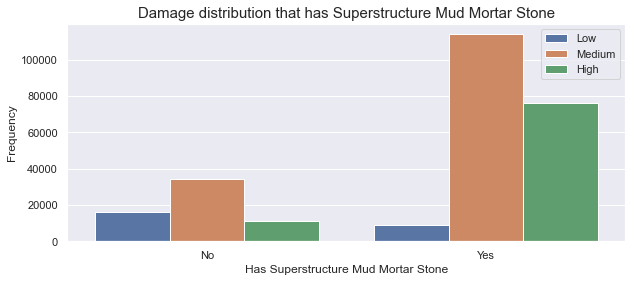

In [ ]:
count_plot(train, 'has_superstructure_mud_mortar_stone', 'Has Superstructure Mud Mortar Stone', 'Superstructure Mud Mortar Stone')

**Has Superstructure Stone Flag**

In [ ]:
train['has_superstructure_stone_flag'].value_counts()

0    251654
1      8947
Name: has_superstructure_stone_flag, dtype: int64

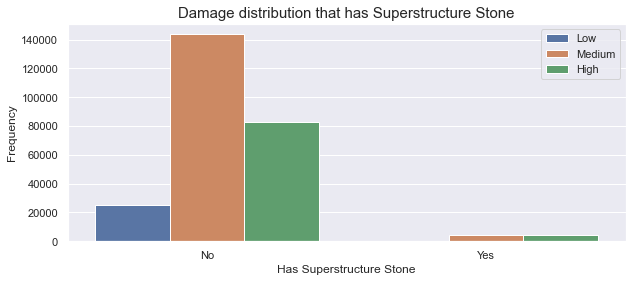

In [ ]:
count_plot(train, 'has_superstructure_stone_flag', 'Has Superstructure Stone', 'Superstructure Stone')

**Has Superstructure Cement Mortar Stone**

In [ ]:
train['has_superstructure_cement_mortar_stone'].value_counts()

0    255849
1      4752
Name: has_superstructure_cement_mortar_stone, dtype: int64

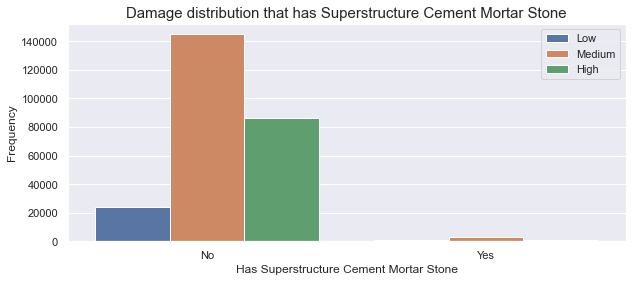

In [ ]:
count_plot(train, 'has_superstructure_cement_mortar_stone', 'Has Superstructure Cement Mortar Stone', 'Superstructure Cement Mortar Stone')

**Has Superstructure Mud Mortar Brick**

In [ ]:
train['has_superstructure_mud_mortar_brick'].value_counts()

0    242840
1     17761
Name: has_superstructure_mud_mortar_brick, dtype: int64

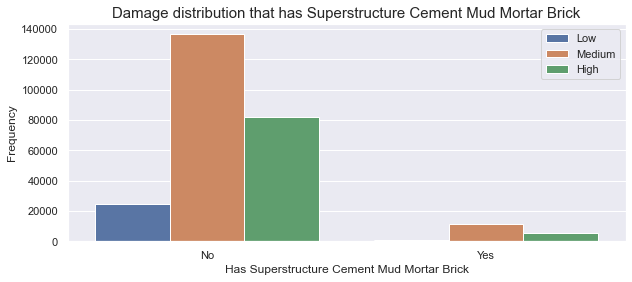

In [ ]:
count_plot(train, 'has_superstructure_mud_mortar_brick', 'Has Superstructure Cement Mud Mortar Brick', 'Superstructure Cement Mud Mortar Brick')

**Has Superstructure Cement Mortar Brick**

In [ ]:
train['has_superstructure_cement_mortar_brick'].value_counts()

0    240986
1     19615
Name: has_superstructure_cement_mortar_brick, dtype: int64

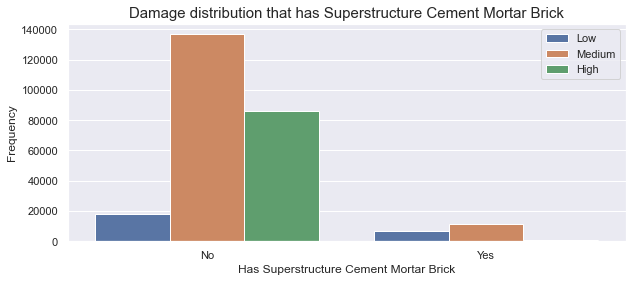

In [ ]:
count_plot(train, 'has_superstructure_cement_mortar_brick', 'Has Superstructure Cement Mortar Brick', 'Superstructure Cement Mortar Brick')

**Has Superstructure Timber**

In [ ]:
train['has_superstructure_timber'].value_counts()

0    194151
1     66450
Name: has_superstructure_timber, dtype: int64

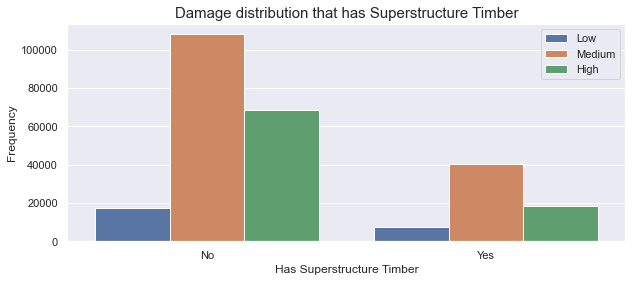

In [ ]:
count_plot(train, 'has_superstructure_timber', 'Has Superstructure Timber', 'Superstructure Timber')

**Has Superstructure Bamboo**

In [ ]:
train['has_superstructure_bamboo'].value_counts()

0    238447
1     22154
Name: has_superstructure_bamboo, dtype: int64

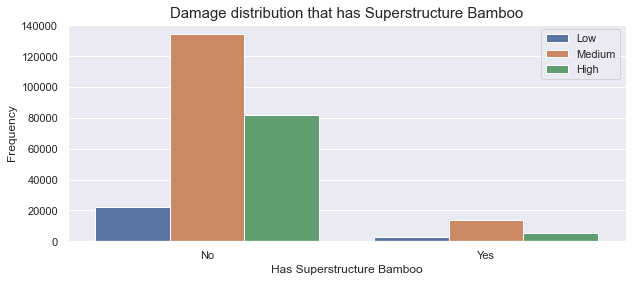

In [ ]:
count_plot(train, 'has_superstructure_bamboo', 'Has Superstructure Bamboo', 'Superstructure Bamboo')

**Has Superstructure RC Non Engineered**

In [ ]:
train['has_superstructure_rc_non_engineered'].value_counts()

0    249502
1     11099
Name: has_superstructure_rc_non_engineered, dtype: int64

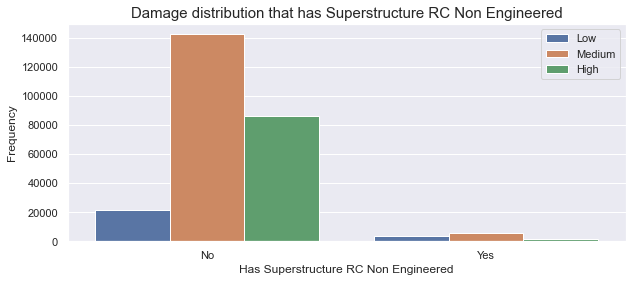

In [ ]:
count_plot(train, 'has_superstructure_rc_non_engineered', 'Has Superstructure RC Non Engineered', 'Superstructure RC Non Engineered')

**Has Superstructure RC Engineered**

In [ ]:
train['has_superstructure_rc_engineered'].value_counts()

0    256468
1      4133
Name: has_superstructure_rc_engineered, dtype: int64

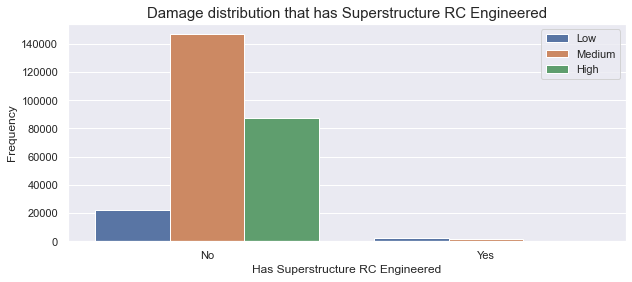

In [ ]:
count_plot(train, 'has_superstructure_rc_engineered', 'Has Superstructure RC Engineered', 'Superstructure RC Engineered')

**Has Superstructure Other**

In [ ]:
train['has_superstructure_other'].value_counts()

0    256696
1      3905
Name: has_superstructure_other, dtype: int64

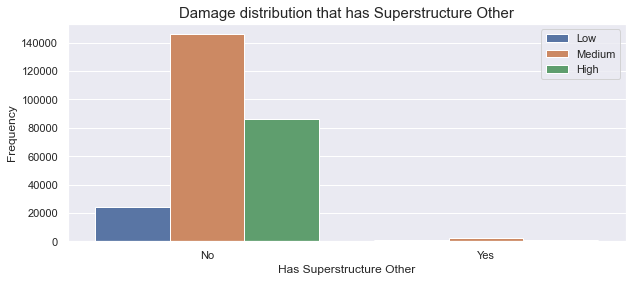

In [ ]:
count_plot(train, 'has_superstructure_other', 'Has Superstructure Other', 'Superstructure Other')

Pada bangunan yang ada di Nepal, superstruktur yang banyak digunakan pada bangunan adalah superstruktur campuran antara *Mud Mortar Stone* atau superstruktur dari *Timber*. Pada bangunan yang menggunakan superstruktur tersebut kebanyakan mengalami tingkat kerusakan menengah kemudian disusul dengna tingkat kerusakan tinggi.

**Has Secondary Use**

In [ ]:
train['has_secondary_use'].value_counts()

0    231445
1     29156
Name: has_secondary_use, dtype: int64

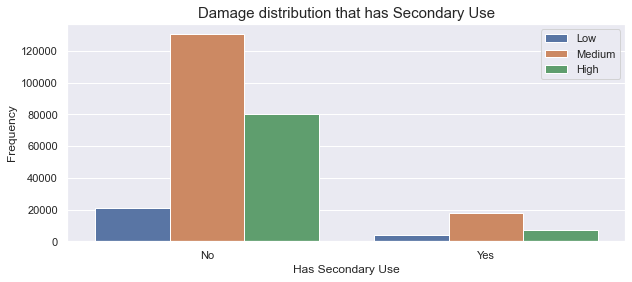

In [ ]:
count_plot(train, 'has_secondary_use', 'Has Secondary Use', 'Secondary Use')

**Has Secondary Use Agriculture**

In [ ]:
train['has_secondary_use_agriculture'].value_counts()

0    243824
1     16777
Name: has_secondary_use_agriculture, dtype: int64

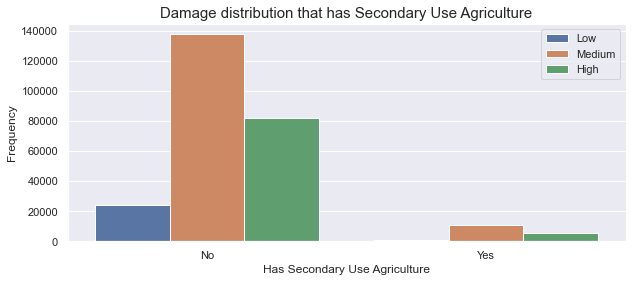

In [ ]:
count_plot(train, 'has_secondary_use_agriculture', 'Has Secondary Use Agriculture', 'Secondary Use Agriculture')

**Has Secondary Use Hotel**

In [ ]:
train['has_secondary_use_hotel'].value_counts()

0    251838
1      8763
Name: has_secondary_use_hotel, dtype: int64

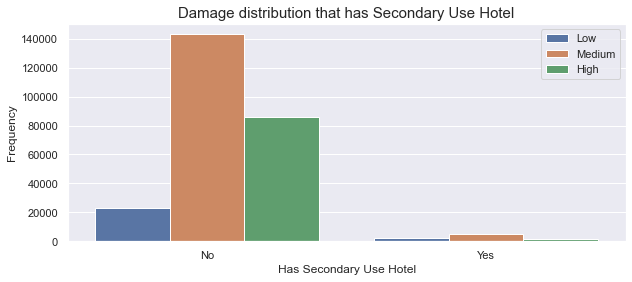

In [ ]:
count_plot(train, 'has_secondary_use_hotel', 'Has Secondary Use Hotel', 'Secondary Use Hotel')

**Has Secondary Use Rental**

In [ ]:
train['has_secondary_use_rental'].value_counts()

0    258490
1      2111
Name: has_secondary_use_rental, dtype: int64

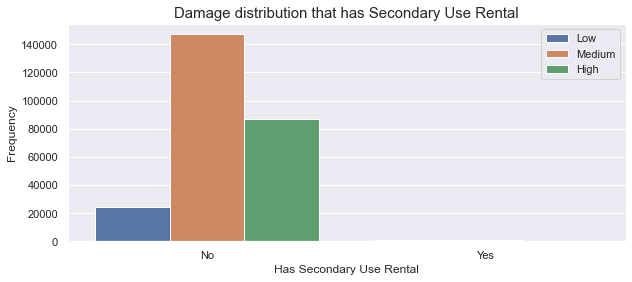

In [ ]:
count_plot(train, 'has_secondary_use_rental', 'Has Secondary Use Rental', 'Secondary Use Rental')

**Has Secondary Use Institution**

In [ ]:
train['has_secondary_use_institution'].value_counts()

0    260356
1       245
Name: has_secondary_use_institution, dtype: int64

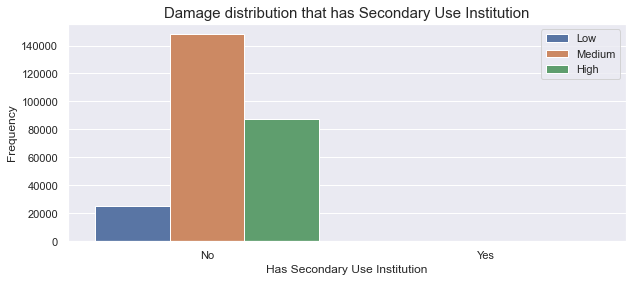

In [ ]:
count_plot(train, 'has_secondary_use_institution', 'Has Secondary Use Institution', 'Secondary Use Institution')

**Has Secondary Use School**

In [ ]:
train['has_secondary_use_school'].value_counts()

0    260507
1        94
Name: has_secondary_use_school, dtype: int64

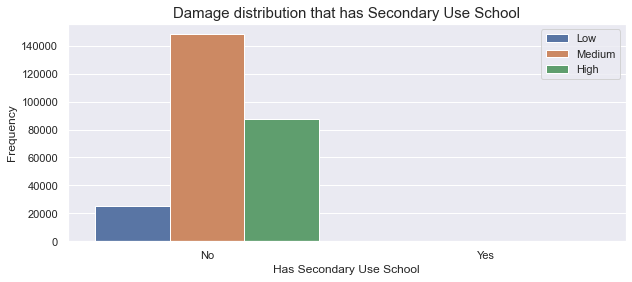

In [ ]:
count_plot(train, 'has_secondary_use_school', 'Has Secondary Use School', 'Secondary Use School')

**Has Secondary User Industry**

In [ ]:
train['has_secondary_use_industry'].value_counts()

0    260322
1       279
Name: has_secondary_use_industry, dtype: int64

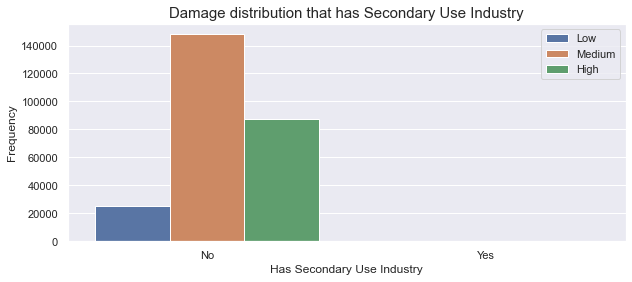

In [ ]:
count_plot(train, 'has_secondary_use_industry', 'Has Secondary Use Industry', 'Secondary Use Industry')

**Has Secondary Use Health Post**

In [ ]:
train['has_secondary_use_health_post'].value_counts()

0    260552
1        49
Name: has_secondary_use_health_post, dtype: int64

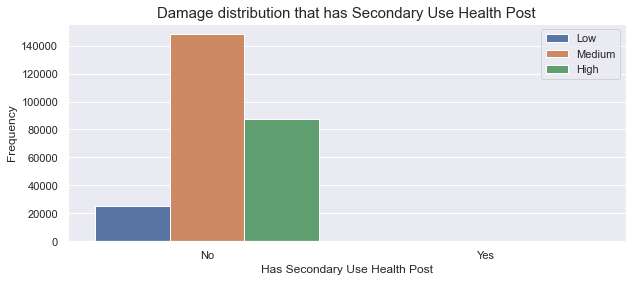

In [ ]:
count_plot(train, 'has_secondary_use_health_post', 'Has Secondary Use Health Post', 'Secondary Use Health Post')

**Has Secondary Use Goverment Office**

In [ ]:
train['has_secondary_use_gov_office'].value_counts()

0    260563
1        38
Name: has_secondary_use_gov_office, dtype: int64

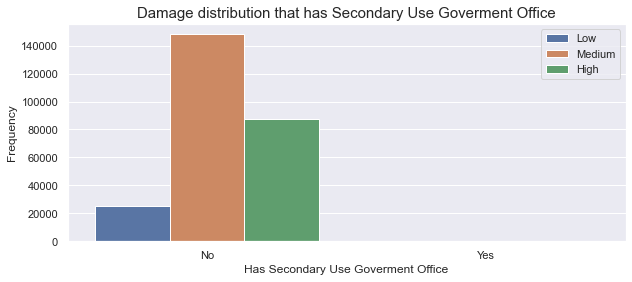

In [ ]:
count_plot(train, 'has_secondary_use_gov_office', 'Has Secondary Use Goverment Office', 'Secondary Use Goverment Office')

**Has Secondary Use Police**

In [ ]:
train['has_secondary_use_use_police'].value_counts()

0    260578
1        23
Name: has_secondary_use_use_police, dtype: int64

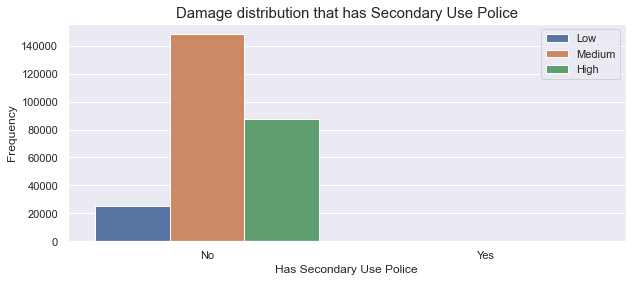

In [ ]:
count_plot(train, 'has_secondary_use_use_police', 'Has Secondary Use Police', 'Secondary Use Police')

**Has Secondary Use Other**

In [ ]:
train['has_secondary_use_other'].value_counts()

0    259267
1      1334
Name: has_secondary_use_other, dtype: int64

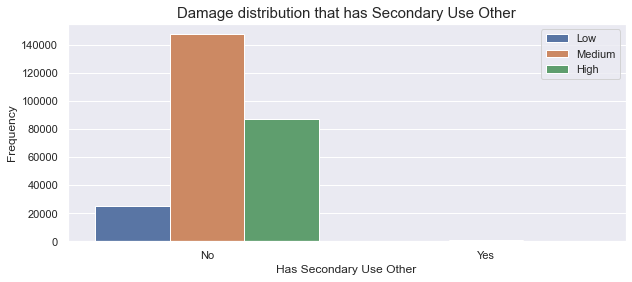

In [ ]:
count_plot(train, 'has_secondary_use_other', 'Has Secondary Use Other', 'Secondary Use Other')

Selain bangunan untuk tujuan pribadi, banyak bangunan di Nepal yang digunakan untuk tujuan pertanian, hotel, penyewaan, institusi, sekolah, pos kesehatan, kantor pemerintahan, kantor polisi, dan tujuan lainnya. Bangunan yang mempunyai tujuan sekunder sebagai sarana pertanian dan hotel merupakan dua sektor dengan jumlah bangunan terbanyak dibandingkan dengan bangunan dengan tujuan sekunder lain. Kebanyakan bangunan dengan tujuan sekunder pertanian dan hotel mengalami tingkat kerusakan menengah.

## **Facetgrid**

In [ ]:
def facet_plot(data, col, x, x_label):
    grid = sns.FacetGrid(data, col=col, row='damage_grade', size=4, aspect=2, sharey=False)
    grid.map(plt.hist, x, bins=20)
    grid.set_xlabels(x_label)
    grid.set_ylabels('Frequency')
    plt.show()

### **Superstructure RC, non RC, Mud Mortar Stone, Mud Mortar Brick, Cement Mortar Brick and Number of Floor**

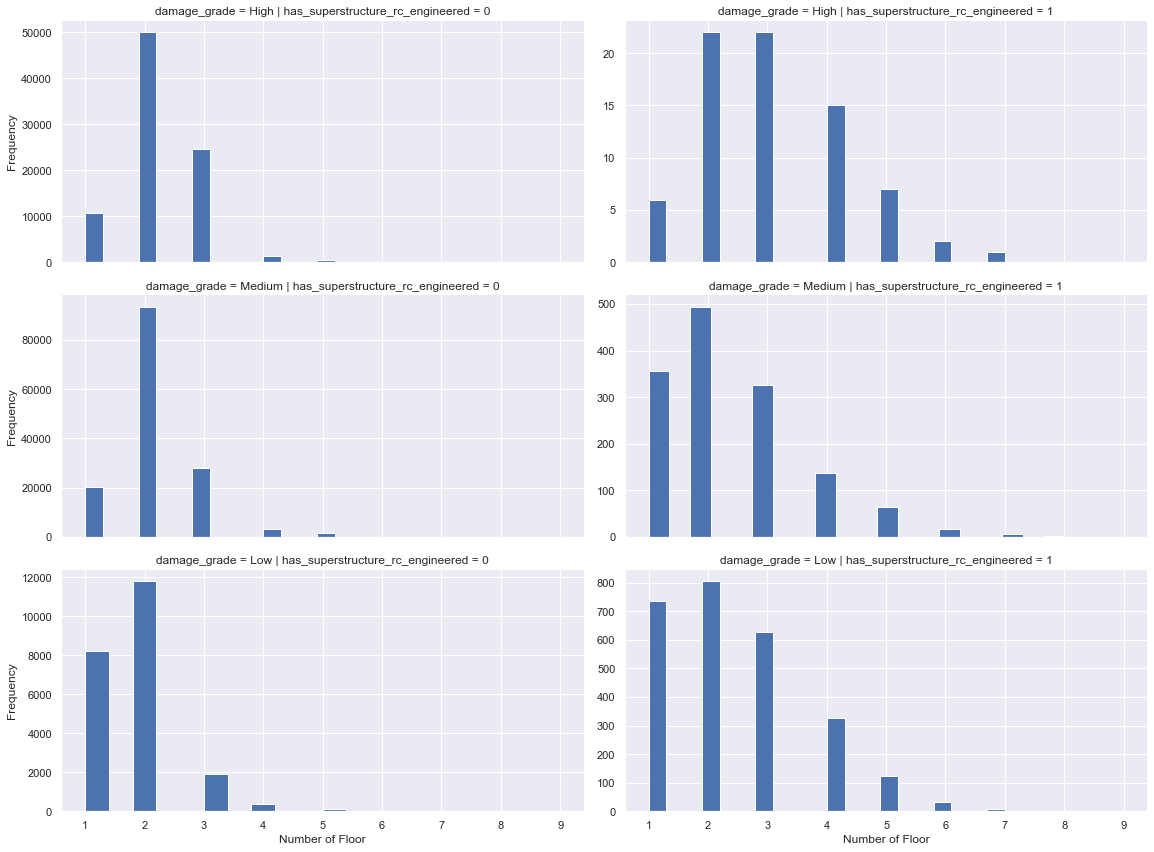

In [ ]:
facet_plot(train, 'has_superstructure_rc_engineered', 'count_floors_pre_eq', 'Number of Floor')

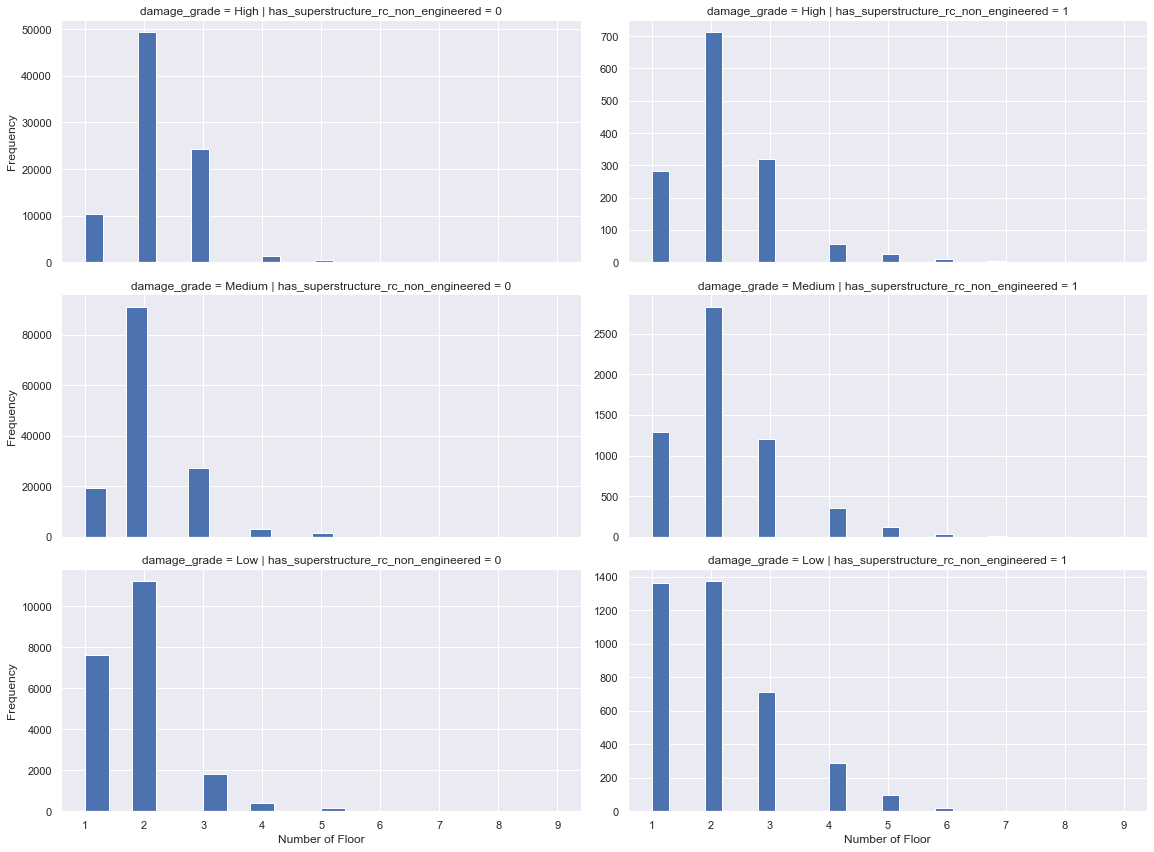

In [ ]:
facet_plot(train, 'has_superstructure_rc_non_engineered', 'count_floors_pre_eq', 'Number of Floor')

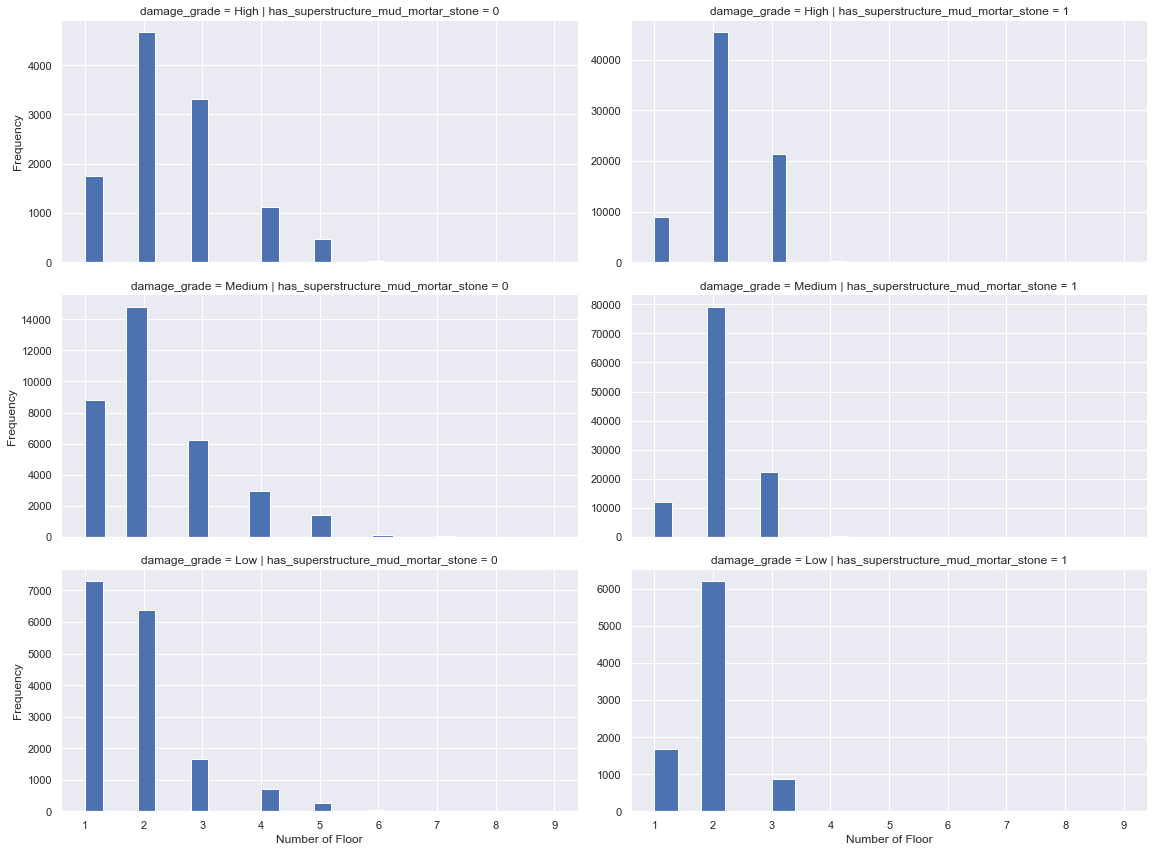

In [ ]:
facet_plot(train, 'has_superstructure_mud_mortar_stone', 'count_floors_pre_eq', 'Number of Floor')

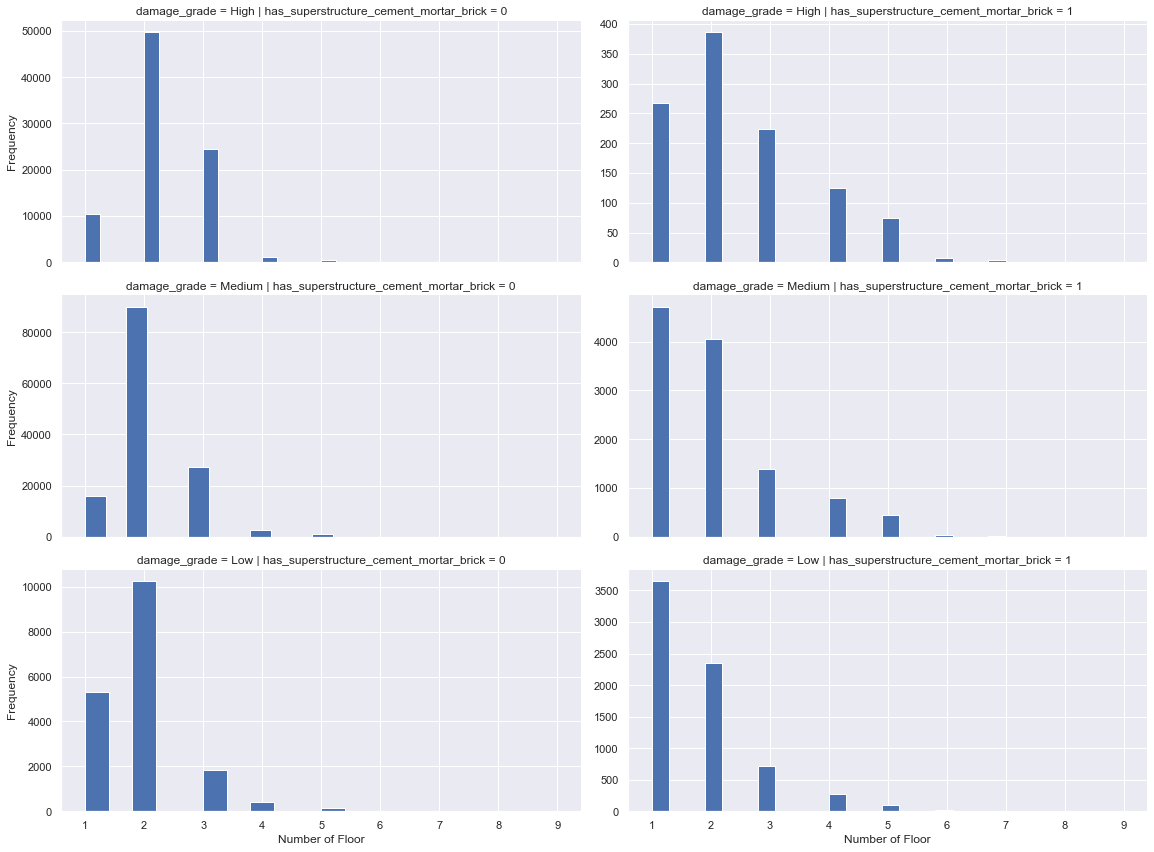

In [ ]:
facet_plot(train, 'has_superstructure_cement_mortar_brick', 'count_floors_pre_eq', 'Number of Floor')

### **Superstructure RC, non RC, Mud Mortar Stone, Mud Mortar Brick, Cement Mortar Brick and Height Percentage**

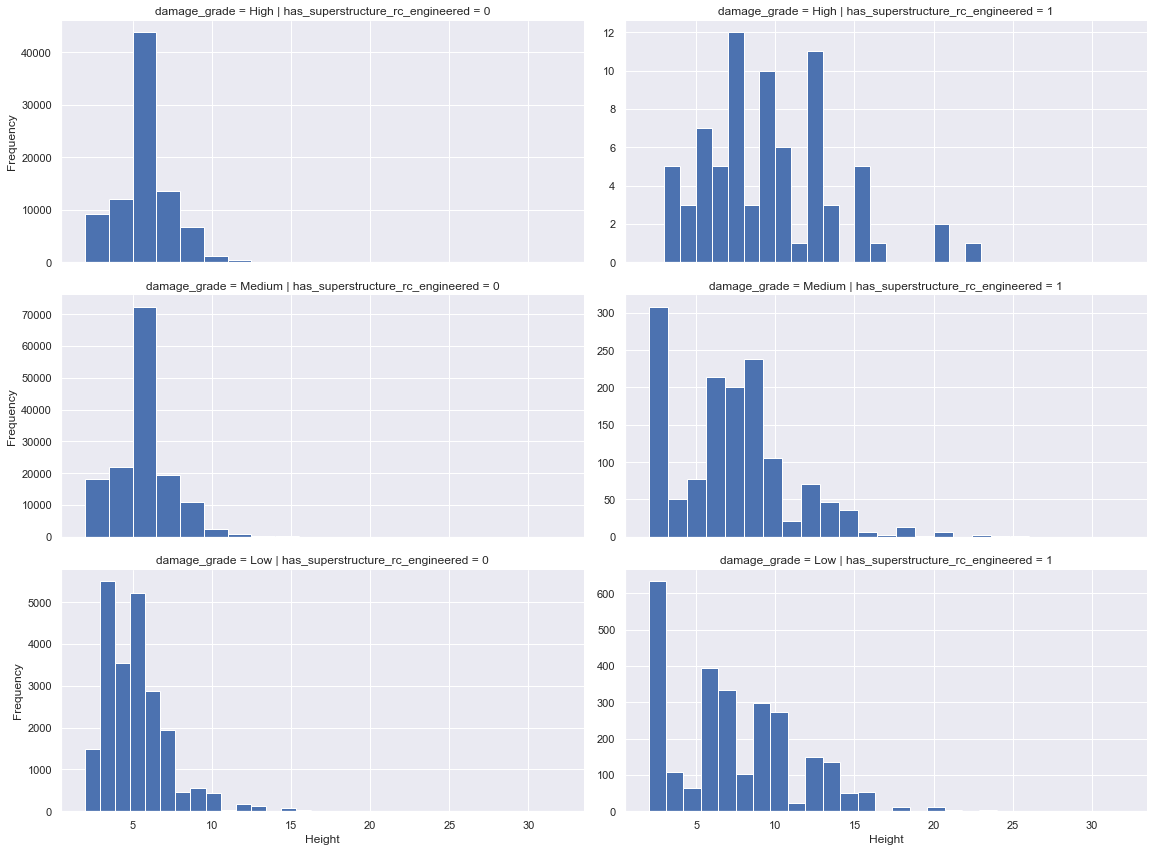

In [ ]:
facet_plot(train, 'has_superstructure_rc_engineered', 'height_percentage', 'Height')

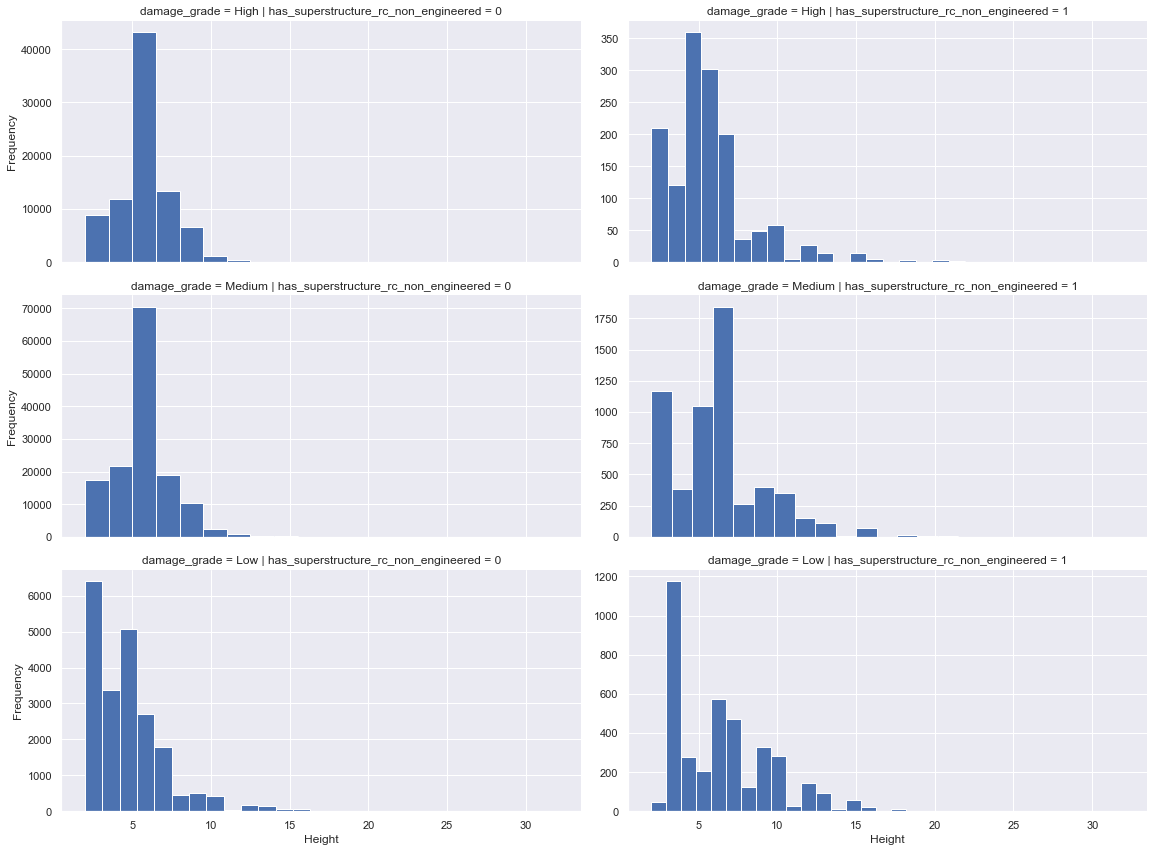

In [ ]:
facet_plot(train, 'has_superstructure_rc_non_engineered', 'height_percentage', 'Height')

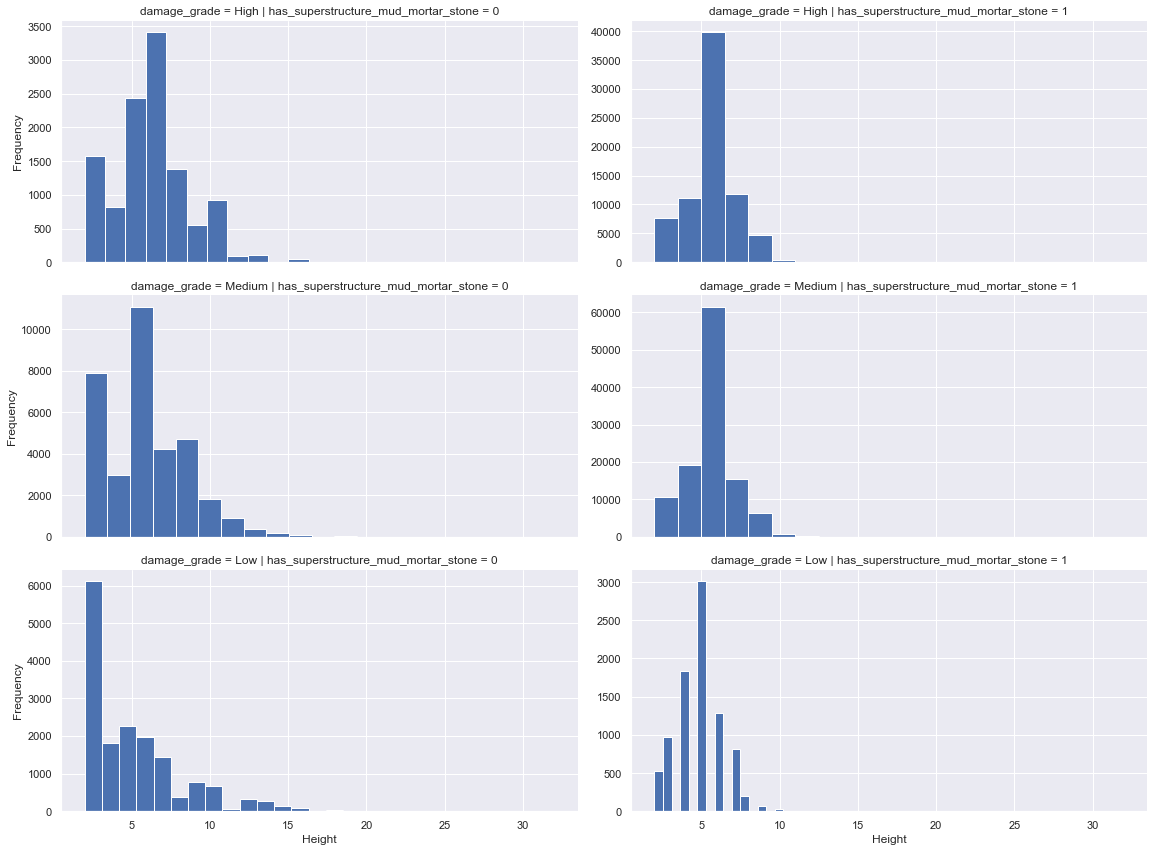

In [ ]:
facet_plot(train, 'has_superstructure_mud_mortar_stone', 'height_percentage', 'Height')

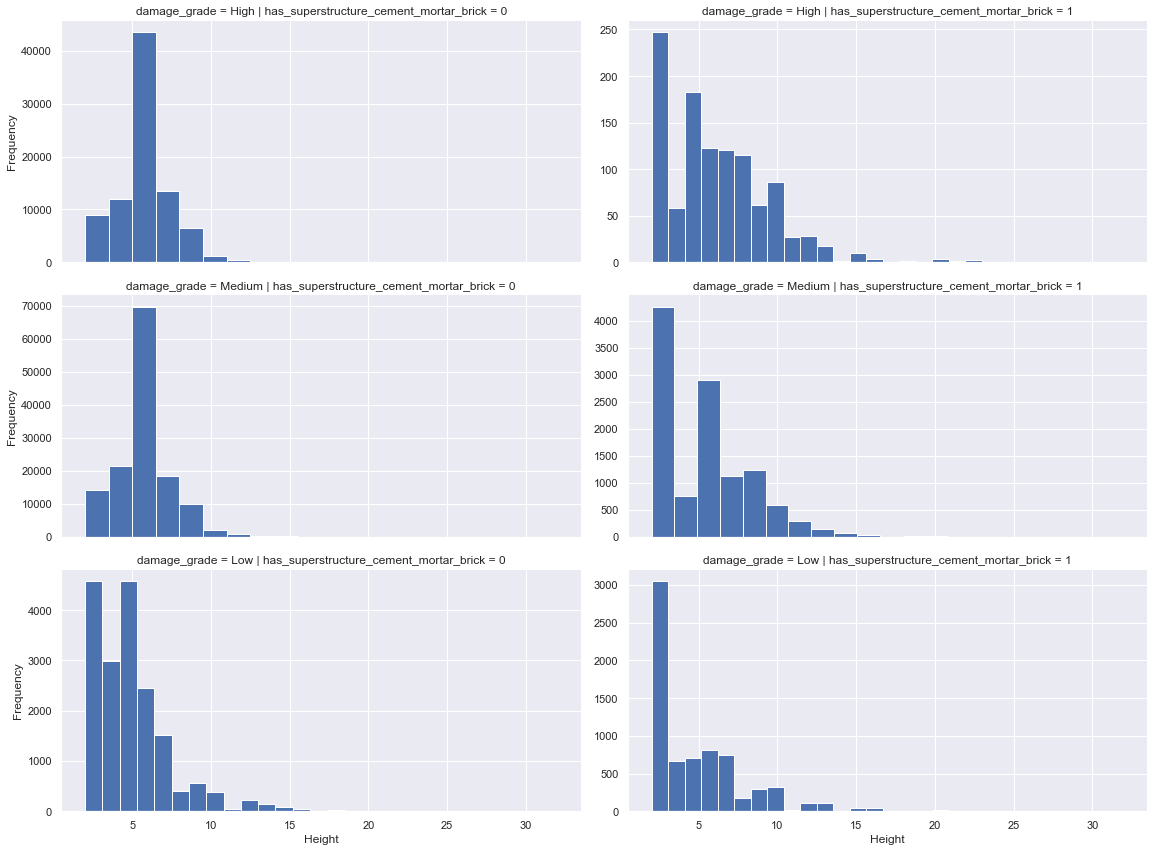

In [ ]:
facet_plot(train, 'has_superstructure_cement_mortar_brick', 'height_percentage', 'Height')

### **Superstructure RC, non RC, Mud Mortar Stone, Mud Mortar Brick, Cement Mortar Brick and Area Percentage**

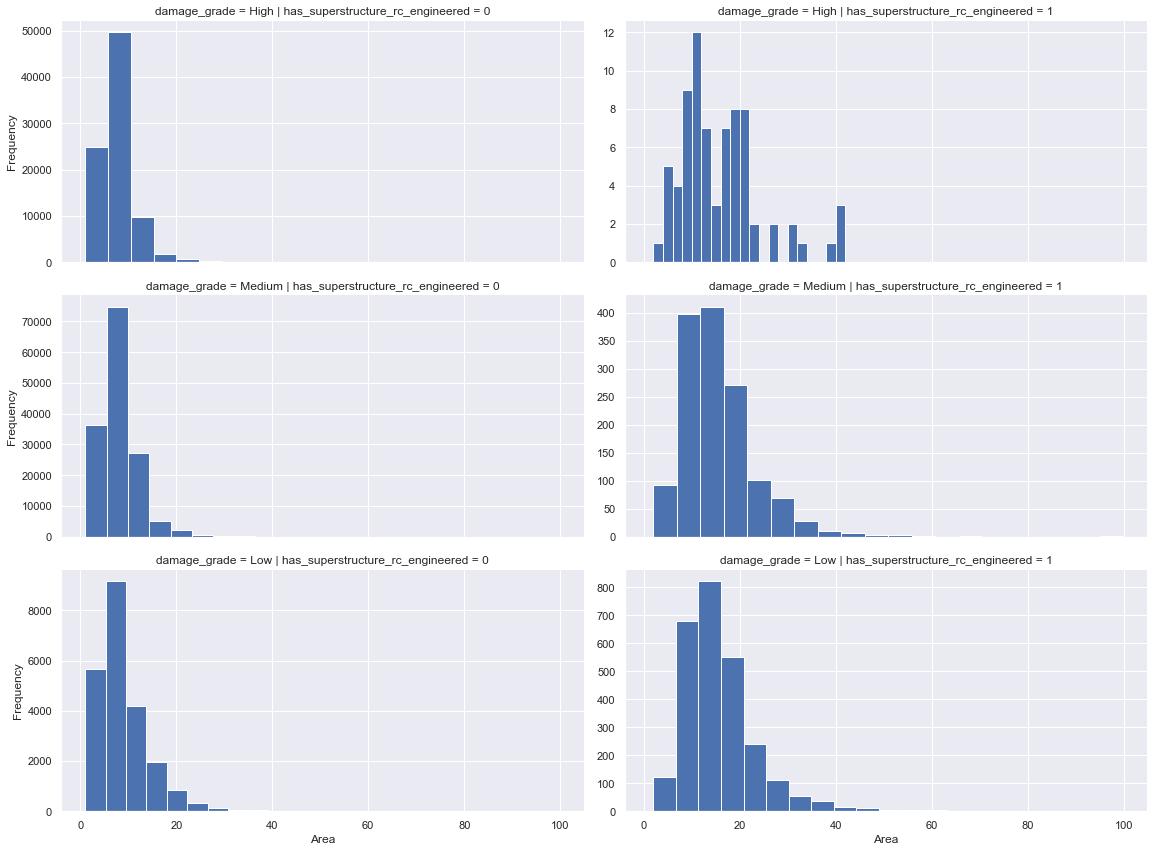

In [ ]:
facet_plot(train, 'has_superstructure_rc_engineered', 'area_percentage', 'Area')

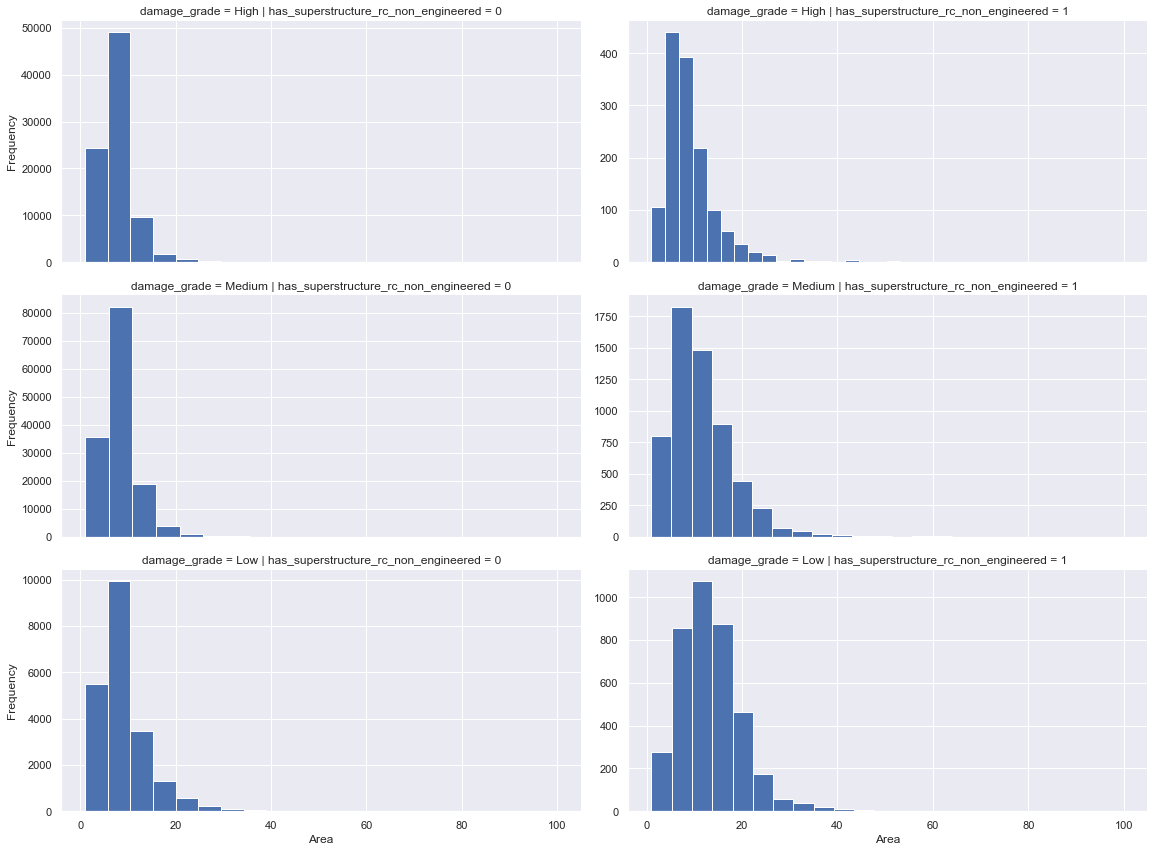

In [ ]:
facet_plot(train, 'has_superstructure_rc_non_engineered', 'area_percentage', 'Area')

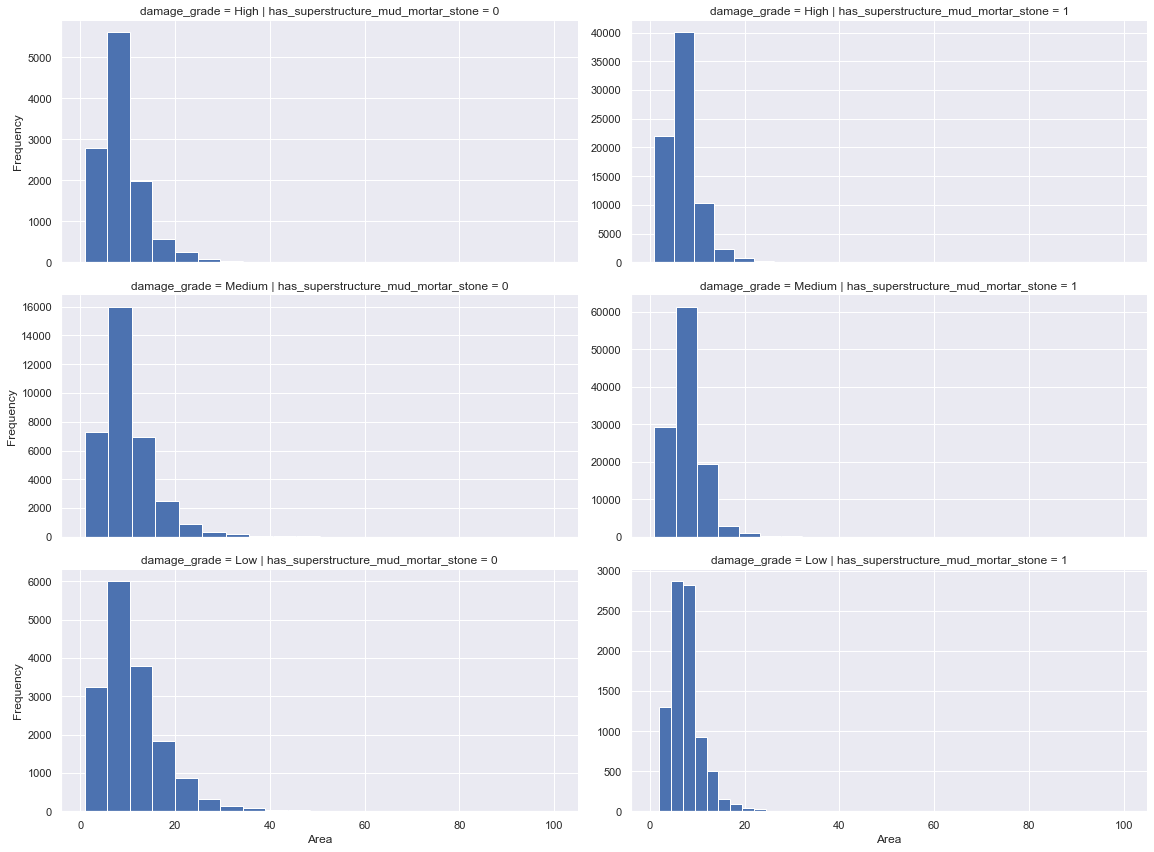

In [ ]:
facet_plot(train, 'has_superstructure_mud_mortar_stone', 'area_percentage', 'Area')

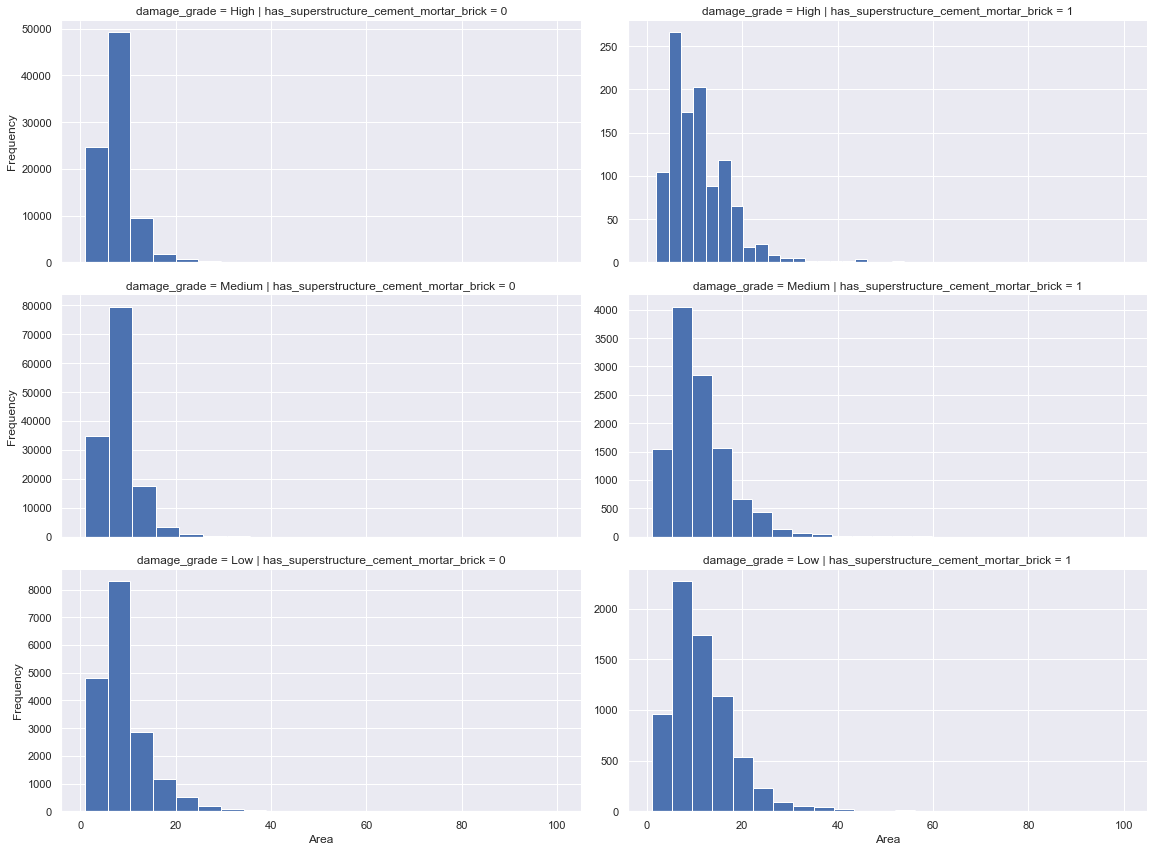

In [ ]:
facet_plot(train, 'has_superstructure_cement_mortar_brick', 'area_percentage', 'Area')

## **Multivariate Analysis**

In [ ]:
train.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [ ]:
features = train.copy()

In [ ]:
features['damage_grade'] = features['damage_grade'].replace({'Low':1, 'Medium':2, 'High':3})
features['damage_grade'] = features['damage_grade'].astype('int64')

In [ ]:
corr_matrix = features.corr()
corr_matrix

building_id  geo_level_1_id  \
building_id                                1.000000       -0.002850   
geo_level_1_id                            -0.002850        1.000000   
geo_level_2_id                             0.000347       -0.061405   
geo_level_3_id                            -0.000393        0.002718   
count_floors_pre_eq                       -0.000654       -0.089364   
age                                       -0.001476       -0.003908   
area_percentage                           -0.002070        0.071158   
height_percentage                          0.000096       -0.063474   
has_superstructure_adobe_mud              -0.000307       -0.018245   
has_superstructure_mud_mortar_stone        0.002423       -0.152038   
has_superstructure_stone_flag              0.001443        0.007677   
has_superstructure_cement_mortar_stone    -0.000827        0.023656   
has_superstructure_mud_mortar_brick       -0.003768       -0.028854   
has_superstructure_cement_mortar_brick     0.001933        0.134121   
has_superstructure_timber                  0.001967        0.144985   
has_superstructure_bamboo                  0.001266        0.074169   
has_superstructure_rc_non_engineered       0.002472        0.016454   
has_superstructure_rc_engineered          -0.002259        0.015767   
has_superstructure_other                   0.002171        0.022670   
count_families                            -0.000599        0.035108   
has_secondary_use                          0.002606       -0.010428   
has_secondary_use_agriculture              0.002631       -0.019786   
has_secondary_use_hotel                    0.001934        0.001911   
has_secondary_use_rental                  -0.002152        0.023523   
has_secondary_use_institution              0.000706        0.003700   
has_secondary_use_school                  -0.000362        0.002977   
has_secondary_use_industry                 0.002348        0.002655   
has_secondary_use_health_post             -0.000374       -0.002303   
has_secondary_use_gov_office               0.000538        0.001060   
has_secondary_use_use_police              -0.003116        0.000523   
has_secondary_use_other                   -0.002295       -0.017992   
damage_grade                               0.001063       -0.072347   

                                        geo_level_2_id  geo_level_3_id  \
building_id                                   0.000347       -0.000393   
geo_level_1_id                               -0.061405        0.002718   
geo_level_2_id                                1.000000        0.000921   
geo_level_3_id                                0.000921        1.000000   
count_floors_pre_eq                           0.047730       -0.021646   
age                                           0.012594       -0.006385   
area_percentage                              -0.049443       -0.005643   
height_percentage                             0.035516       -0.024507   
has_superstructure_adobe_mud                  0.015833       -0.015732   
has_superstructure_mud_mortar_stone           0.076491        0.026294   
has_superstructure_stone_flag                -0.008743        0.019579   
has_superstructure_cement_mortar_stone       -0.009122        0.005966   
has_superstructure_mud_mortar_brick           0.014246       -0.023278   
has_superstructure_cement_mortar_brick       -0.079875       -0.005116   
has_superstructure_timber                    -0.023927       -0.003916   
has_superstructure_bamboo                    -0.032588        0.006143   
has_superstructure_rc_non_engineered         -0.038173        0.002265   
has_superstructure_rc_engineered             -0.036074       -0.012420   
has_superstructure_other                     -0.020144       -0.010604   
count_families                               -0.012439       -0.002479   
has_secondary_use                            -0.001519        0.007375   
has_secondary_use_agriculture                 0.017522        0.0159

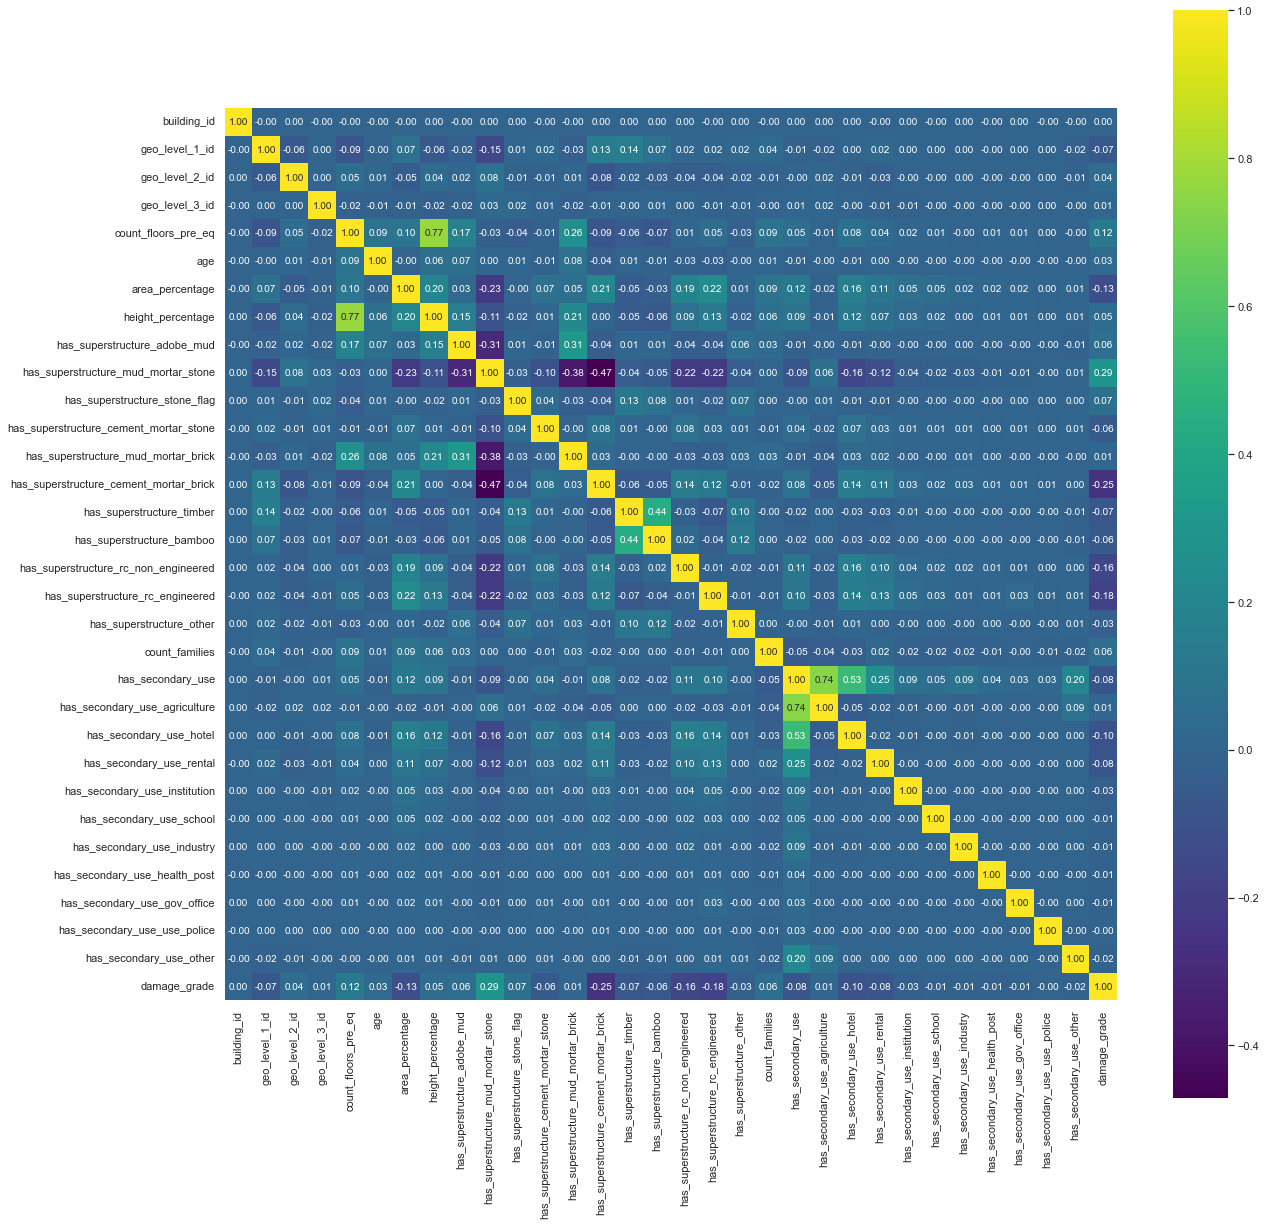

In [ ]:
plt.figure(figsize=(20,20))

sns.heatmap(corr_matrix, annot=True, cmap='viridis', square=True, fmt='.2f', annot_kws={'size': 10})
plt.show()

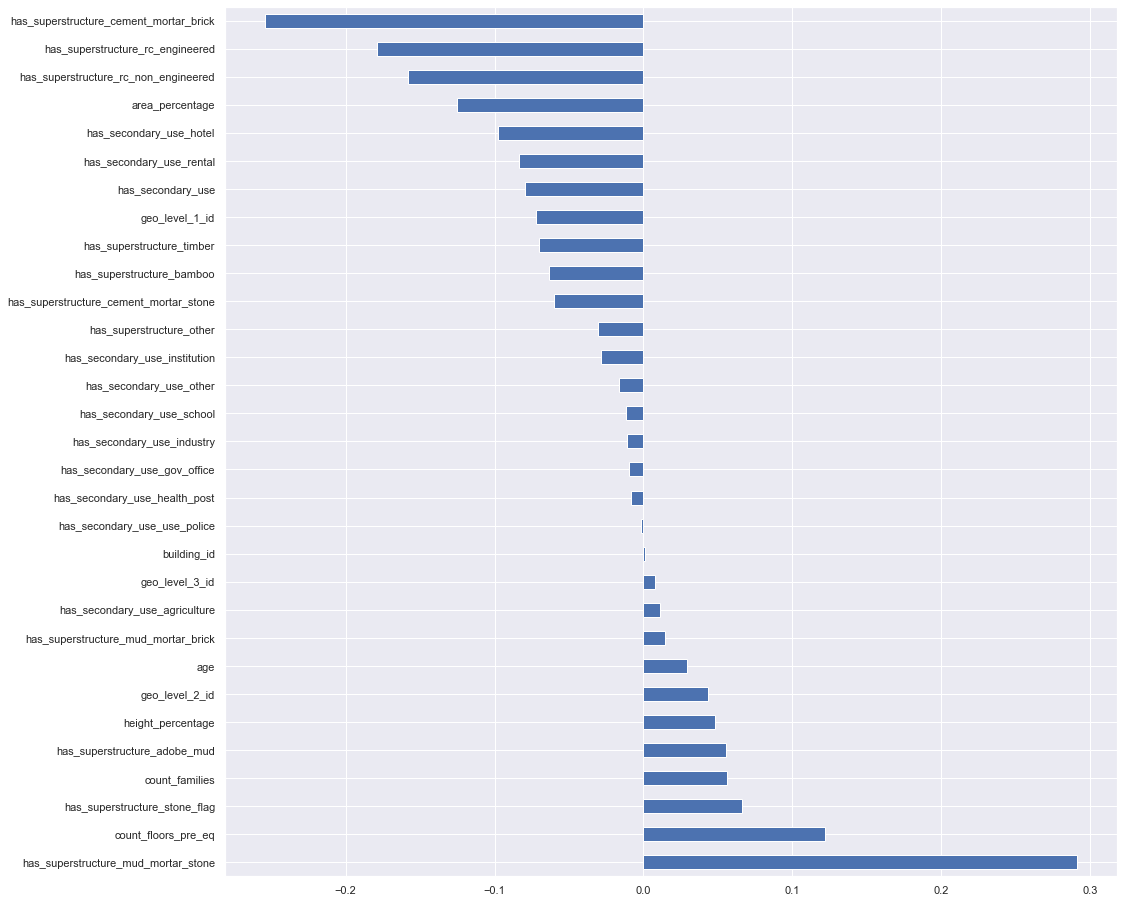

In [ ]:
plt.figure(figsize=(16,16))

corr_matrix['damage_grade'].drop('damage_grade').sort_values(ascending=False).plot(kind='barh')
plt.show()

## **EDA (Recommendation Material and Characteristic)**

In [ ]:
list_corr = corr_matrix['damage_grade'].drop('damage_grade')
list_corr

building_id                               0.001063
geo_level_1_id                           -0.072347
geo_level_2_id                            0.043161
geo_level_3_id                            0.007932
count_floors_pre_eq                       0.122308
age                                       0.029273
area_percentage                          -0.125221
height_percentage                         0.048130
has_superstructure_adobe_mud              0.055314
has_superstructure_mud_mortar_stone       0.291325
has_superstructure_stone_flag             0.066039
has_superstructure_cement_mortar_stone   -0.060295
has_superstructure_mud_mortar_brick       0.014561
has_superstructure_cement_mortar_brick   -0.254131
has_superstructure_timber                -0.069852
has_superstructure_bamboo                -0.063051
has_superstructure_rc_non_engineered     -0.158145
has_superstructure_rc_engineered         -0.179014
has_superstructure_other                 -0.030224
count_families                 

**Recommendation Material**

Definisikan *features* yang termasuk ke dalam kategori material adalah 
*   ***has_superstructure_adobe_mud***
*   ***has_superstructure_mud_mortar_stone***
*   ***has_superstructure_stone_flag***
*   ***has_superstructure_cement_mortar_stone***
*   ***has_superstructure_mud_mortar_brick***
*   ***has_superstructure_cement_mortar_brick***
*   ***has_superstructure_timber***
*   ***has_superstructure_bamboo***
*   ***has_superstructure_rc_non_engineered***
*   ***has_superstructure_rc_engineered***
*   ***has_superstructure_other***


In [ ]:
list_corr.loc[[
              'has_superstructure_adobe_mud', 
              'has_superstructure_mud_mortar_stone',
              'has_superstructure_stone_flag',
              'has_superstructure_cement_mortar_stone',
              'has_superstructure_mud_mortar_brick',
              'has_superstructure_cement_mortar_brick', 
              'has_superstructure_timber',
              'has_superstructure_bamboo', 
              'has_superstructure_rc_non_engineered',
              'has_superstructure_rc_engineered', 
              'has_superstructure_other'
              ]]

has_superstructure_adobe_mud              0.055314
has_superstructure_mud_mortar_stone       0.291325
has_superstructure_stone_flag             0.066039
has_superstructure_cement_mortar_stone   -0.060295
has_superstructure_mud_mortar_brick       0.014561
has_superstructure_cement_mortar_brick   -0.254131
has_superstructure_timber                -0.069852
has_superstructure_bamboo                -0.063051
has_superstructure_rc_non_engineered     -0.158145
has_superstructure_rc_engineered         -0.179014
has_superstructure_other                 -0.030224
Name: damage_grade, dtype: float64

Berdasarkan gambar dari pengaruh *features* material bangunan terhadap tingkat kerusakan bangunan, kita akan memilih 4 *features* material yang memiliki tingkat korelasi tertinggi dengan **damage_grade**. 4 *features* tersebut adalah **has_superstructure_mud_mortar_stone**, **has_superstructure_cement_mortar_brick**, **has_superstructure_rc_engineered**, dan **has_superstructure_rc_non_engineered**. Diperoleh beberapa *insight* berdasarkan data pada proses EDA sebelumnya yaitu.
*  Bangunan yang tidak mempunyai superstruktur *Reinforce Concrete Engineered* banyak mengalami tingkat kerusakan menengah dan tinggi jika dilihat berdarkan persebaranya terhadap jumlah lantai, tinggi bangunan, dan luas bangunan.
*  Jumlah bangunan yang menggunakan superstruktur *Reinforce Concrete Non Engineered* mengalami tingkat kerusakan mengengah lebih daripada jumlah bangunan yang menggunakan superstruktur *Reinforce Concrete Engineered* jika dilihat berdarkan persebaranya terhadap jumlah lantai, tinggi bangunan, dan luas bangunan.
*  Bangunan yang menggunakan superstruktur *Cement Mortar Brick* mengalami tingkat kerusakan yang lebih rendah dibandingkan yang tidak menggunakan.

Maka dari itu kita dapat memberikan rekomendasi karakteristik bangunan (rumah) dengan ciri-ciri sebagai berikut.
*  Menggunakan superstruktur *Reinforce Conrete Engineered*
*  Menggunakan superstruktur *Cement Mortar Brick*

**Recommendation Characteristic**

Definisikan *features* yang termasuk ke dalam kategori karakteristik adalah 

*   ***count_floors_pre_eq***
*   ***age***
*   ***area_percentage***
*   ***height_percentage***
*   ***foundation_type***
*   ***roof_type***
*   ***ground_floor_type***
*   ***other_floor_type*** 
*   ***position***

In [ ]:
list_corr.loc[['count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage']]

count_floors_pre_eq    0.122308
age                    0.029273
area_percentage       -0.125221
height_percentage      0.048130
Name: damage_grade, dtype: float64

Berdasarkan gambar dari pengaruh *features* karakteristik bangunan terhadap tingkat kerusakan bangunan, diperoleh bangunan yang mengalami tingkat kerusakan terbanyak adalah bangunan dengan kriteria sebagai berikut.
*  Bangunan dengan jumlah lantai sebanyak 2
*  Bangunan yang berusia 0-50 tahun
*  Bangunan dengan tinggi ternormalisasi 3-9 $m$
*  Bangunan dengan luas ternormalisasi 4-10 $m^2$ 

Maka dari itu kita dapat memberikan rekomendasi karakteristik bangunan (rumah) dengan ciri-ciri sebagai berikut.
*  Bangunan dengan jumlah lantai sebanyak 1 atau 3
*  Bangunan dengan tinggi ternormalisasi kurang dari 3 $m$ atau lebih dari 9 $m$
*  Bangunan dengan luas ternormalisasi kurang dari 4 $m^2$ atau lebih dari 10 $m^2$

## **Feature Selection**

In [ ]:
df = train.copy()
df = df.set_index('building_id')

**Pisahkan Feature Numerik dan Kategorikal**

In [ ]:
df_num = df.select_dtypes(include=['int64', 'float64'])
df_cat = df.select_dtypes(include=['object'])

**Feature Selection Untuk Feature Numerik**

Pada matrik korelasi sebelumnya terlihat bahwa terdapat dua buah feature yang memiliki tingkat korelasi yang tinggi (>0.7). Penggunakan matrik korelasi dapat dilakukan untuk mengecek multicollinearity. Multicollinearity dapat menimbulkan masalah seperti redudansi dimana dua feature tersebut dapat menyimpan informasi yang serupa/mirip. Dalam mengatasi multicollinearity, kita dapat membuang dua buah feature tersebut atau salah satu agar tidak ada feature yang mempunyai tingkat korelasi yang tinggi dengan feature lain. Akan dicek antara feature ***height_percentage*** dan ***has_secondary_use_agriculture*** yang mempunyai tingkat korelasi lebih tinggi terhadap target ***damage_grade***.

In [ ]:
print('Korelasi feature height_percentange dengan damage_grade : {:.4f}'.format(target_corr_matrix['height_percentage']))
print('Korelasi feature has_secondary_use_agriculture dengan damage_grade : {:.4f}'.format(target_corr_matrix['has_secondary_use_agriculture']))

Korelasi feature height_percentange dengan damage_grade : 0.0481
Korelasi feature has_secondary_use_agriculture dengan damage_grade : 0.0113


Berdasarkan nilai korelasi di atas, terlihat bahwa feature ***height_percentage*** mempunyai tingkat korelasi yang lebih tinggi, maka kita akan membuang feature ***has_secondary_use_agriculture***.

In [ ]:
df_num.head()

geo_level_1_id  geo_level_2_id  geo_level_3_id  \
building_id                                                   
802906                    6             487           12198   
28830                     8             900            2812   
94947                    21             363            8973   
590882                   22             418           10694   
201944                   11             131            1488   

             count_floors_pre_eq  age  area_percentage  height_percentage  \
building_id                                                                 
802906                         2   30                6                  5   
28830                          2   10                8                  7   
94947                          2   10                5                  5   
590882                         2   10                6                  5   
201944                         3   30                8                  9   

             has_superstructure_adobe_mud  \
building_id                                 
802906                                  1   
28830                                   0   
94947                                   0   
590882                                  0   
201944                                  1   

             has_superstructure_mud_mortar_stone  \
building_id                                        
802906                                         1   
28830                                          1   
94947                                          1   
590882                                         1   
201944                                         0   

             has_superstructure_stone_flag  ...  has_secondary_use_hotel  \
building_id                                 ...                            
802906                                   0  ...                        0   
28830                                    0  ...                        0   
94947                                    0  ...                        0   
590882                                   0  ...                        0   
201944                                   0  ...                        0   

             has_secondary_use_rental  has_secondary_use_institution  \
building_id                                                            
802906                              0                              0   
28830                               0                              0   
94947                               0                              0   
590882                              0                              0   
201944                              0                              0   

             has_secondary_use_school  has_secondary_use_industry  \
building_id                                                         
802906                              0                           0   
28830                               0                           0   
94947                               0                           0   
590882                              0                           0   
201944                              0                           0   

             has_secondary_use_health_post  has_secondary_use_gov_office  \
building_id                                                                
802906                                   0                             0   
28830                                    0                             0   
94947                                    0                             0   
590882                                   0                             0   
201944                                   0                             0   

             has_secondary_use_use_police  has_secondary_use_other  \
building_id                                                          
802906                                  0                        0   
28830                                   0                        0   
94947          

In [ ]:
df_num = df_num.drop('has_secondary_use_agriculture', axis=1)

In [ ]:
df_num.shape

(260601, 30)

**Feature Selection Untuk Feature Kategorikal**

Proses pemilihan feature yang bertipe kategorikal akan menggunakan *SelectKBest*. Menggunakan hal ini, digunakan metrics *chi squared* yang mana jika *chi squared* semakin tinggi, maka semakin signifikan pengaruh dari feature tersebut.

In [ ]:
df_cat.head()

land_surface_condition foundation_type roof_type  \
building_id                                                    
802906                           t               r         n   
28830                            o               r         n   
94947                            t               r         n   
590882                           t               r         n   
201944                           t               r         n   

            ground_floor_type other_floor_type position plan_configuration  \
building_id                                                                  
802906                      f                q        t                  d   
28830                       x                q        s                  d   
94947                       f                x        t                  d   
590882                      f                x        s                  d   
201944                      f                x        s                  d   

            legal_ownership_status  
building_id                         
802906                           v  
28830                            v  
94947                            v  
590882                           v  
201944                           v

In [ ]:
df_cat = pd.get_dummies(df_cat)

In [ ]:
df_cat.head()

land_surface_condition_n  land_surface_condition_o  \
building_id                                                       
802906                              0                         0   
28830                               0                         1   
94947                               0                         0   
590882                              0                         0   
201944                              0                         0   

             land_surface_condition_t  foundation_type_h  foundation_type_i  \
building_id                                                                   
802906                              1                  0                  0   
28830                               0                  0                  0   
94947                               1                  0                  0   
590882                              1                  0                  0   
201944                              1                  0                  0   

             foundation_type_r  foundation_type_u  foundation_type_w  \
building_id                                                            
802906                       1                  0                  0   
28830                        1                  0                  0   
94947                        1                  0                  0   
590882                       1                  0                  0   
201944                       1                  0                  0   

             roof_type_n  roof_type_q  ...  plan_configuration_m  \
building_id                            ...                         
802906                 1            0  ...                     0   
28830                  1            0  ...                     0   
94947                  1            0  ...                     0   
590882                 1            0  ...                     0   
201944                 1            0  ...                     0   

             plan_configuration_n  plan_configuration_o  plan_configuration_q  \
building_id                                                                     
802906                          0                     0                     0   
28830                           0                     0                     0   
94947                           0                     0                     0   
590882                          0                     0                     0   
201944                          0                     0                     0   

             plan_configuration_s  plan_configuration_u  \
building_id                                               
802906                          0                     0   
28830                           0                     0   
94947                           0                     0   
590882                          0                     0   
201944                          0                     0   

             legal_ownership_status_a  legal_ownership_status_r  \
building_id                                                       
802906                              0                         0   
28830                               0                         0   
94947                               0                         0   
590882                              0                         0   
201944                              0                         0   

             legal_ownership_status_v  legal_ownership_status_w  
building_id                                                      
802906                              1                         0  
28830                               1                         0  
94947                               1                         0  
590882                              1                         0  
201944                              1                         0  

[5 rows x 38 columns]

In [ ]:
df_cat.shape

(260601, 38)

In [ ]:
category_rank_feature = SelectKBest(score_func=chi2, k=38)
rank_feature = category_rank_feature.fit(df_cat, df_num['damage_grade'])
rank_feature.scores_

array([3.14202700e+02, 6.77046429e+01, 6.77640172e+01, 4.15860728e+02,
       2.79293047e+04, 6.39195232e+03, 5.49424844e+03, 8.31579458e+03,
       1.04584801e+03, 1.15697625e+03, 2.80485950e+04, 3.68489235e+03,
       9.75543604e+01, 3.24654211e+04, 6.05516649e+01, 1.22429528e+02,
       7.42291993e+03, 5.10846128e+03, 1.85494082e+04, 4.06602490e+02,
       2.59354872e+02, 1.48779877e+02, 4.93714399e+01, 6.22421247e+02,
       1.09200110e+02, 1.50572497e+02, 3.04753264e+01, 3.34305427e+00,
       1.36435198e+01, 1.65187836e+00, 5.72019260e+01, 3.23110604e+02,
       3.31565900e+01, 1.01176162e+03, 2.26362245e+03, 5.34417037e+01,
       3.96056239e+01, 2.29493063e+02])

In [ ]:
cat_score = pd.DataFrame(rank_feature.scores_, columns=['Score'])
cat_col = pd.DataFrame(df_cat.columns, columns=['Feature'])
univariate_cat_rank = pd.concat([cat_col, cat_score], axis=1)
univariate_cat_rank.set_index('Feature', inplace=True)
sorted_univariate_cat_rank = univariate_cat_rank.sort_values('Score', ascending=False)
#sorted_univariate_cat_rank

In [ ]:
chi2_greater100 = sorted_univariate_cat_rank[sorted_univariate_cat_rank['Score']>100]

**Merge Feature Numerik dan Kategorikal**

In [ ]:
df_new = pd.concat([df_num, df_cat], axis=1)

In [ ]:
df_new.sample(6)

geo_level_1_id  geo_level_2_id  geo_level_3_id  \
building_id                                                   
671063                    8             900            2402   
334036                    3            1387           10110   
855327                   21              30             672   
71688                    12             234            6185   
1026290                  27             216           12323   
981120                    7             129            5248   

             count_floors_pre_eq  age  area_percentage  height_percentage  \
building_id                                                                 
671063                         3   50                8                  5   
334036                         5   30                7                 11   
855327                         2   10                6                  4   
71688                          2   80                7                  4   
1026290                        2   10                4                  5   
981120                         2    5                9                  4   

             has_superstructure_adobe_mud  \
building_id                                 
671063                                  0   
334036                                  1   
855327                                  0   
71688                                   0   
1026290                                 1   
981120                                  0   

             has_superstructure_mud_mortar_stone  \
building_id                                        
671063                                         1   
334036                                         0   
855327                                         1   
71688                                          1   
1026290                                        0   
981120                                         1   

             has_superstructure_stone_flag  ...  plan_configuration_m  \
building_id                                 ...                         
671063                                   0  ...                     0   
334036                                   0  ...                     0   
855327                                   0  ...                     0   
71688                                    0  ...                     0   
1026290                                  0  ...                     0   
981120                                   0  ...                     0   

             plan_configuration_n  plan_configuration_o  plan_configuration_q  \
building_id                                                                     
671063                          0                     0                     0   
334036                          0                     0                     0   
855327                          0                     0                     0   
71688                           0                     0                     0   
1026290                         0                     0                     0   
981120                          0                     0                     0   

             plan_configuration_s  plan_configuration_u  \
building_id                                               
671063                          0                     0   
334036                          0                     0   
855327                          0                     0   
71688                           0                     0   
1026290                         0                     0   
981120                          0                     0   

             legal_ownership_status_a  legal_ownership_status_r  \
building_id                                                       
671063                              0                         0   
334036                              0                         0   
855327                              0                         0   
71688                               0                         0   
1026

## **Split Data into Train Data and Validation Data**

Pisahkan data yang akan digunakan sebagai label atau target variabel dengan feature lainnya. Dalam kasus ini kita membuat variabel y yang menyimpan target variabel dan X yang menyimpan feature lainnya.

In [ ]:
data = df_new.copy()
y = data['damage_grade']
X = data[list(df_num.columns)+list(chi2_greater100.index)]
X.drop('damage_grade', axis=1, inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((208480, 54), (52121, 54), (208480,), (52121,))

In [ ]:
X_train.head()

geo_level_1_id  geo_level_2_id  geo_level_3_id  \
building_id                                                   
882292                   20             281            7097   
193569                   26             886           12157   
898082                   26              36            1125   
136982                   13            1372            4555   
742018                    8             206            6064   

             count_floors_pre_eq  age  area_percentage  height_percentage  \
building_id                                                                 
882292                         2   15                6                  7   
193569                         2   10                6                  6   
898082                         1    0                5                  3   
136982                         2   10                6                  5   
742018                         3   35                6                  5   

             has_superstructure_adobe_mud  \
building_id                                 
882292                                  0   
193569                                  0   
898082                                  0   
136982                                  0   
742018                                  0   

             has_superstructure_mud_mortar_stone  \
building_id                                        
882292                                         1   
193569                                         0   
898082                                         0   
136982                                         1   
742018                                         1   

             has_superstructure_stone_flag  ...  foundation_type_h  \
building_id                                 ...                      
882292                                   0  ...                  0   
193569                                   0  ...                  0   
898082                                   0  ...                  0   
136982                                   0  ...                  0   
742018                                   0  ...                  0   

             other_floor_type_x  plan_configuration_q  \
building_id                                             
882292                        0                     0   
193569                        0                     0   
898082                        0                     0   
136982                        0                     0   
742018                        1                     0   

             land_surface_condition_n  position_j  legal_ownership_status_w  \
building_id                                                                   
882292                              0           0                         0   
193569                              0           0                         0   
898082                              1           0                         0   
136982                              0           0                         0   
742018                              0           0                         0   

             plan_configuration_c  position_o  ground_floor_type_z  \
building_id                                                          
882292                          0           0                    0   
193569                          0           0                    0   
898082                          0           0                    0   
136982                          0           0                    0   
742018                          0           0                    0   

             plan_configuration_a  
building_id                        
882292                          0  
193569                          0  
898082                          0  
136982                          0  
742018                          0  

[5 rows x 54 columns]

In [ ]:
X_test.head()

geo_level_1_id  geo_level_2_id  geo_level_3_id  \
building_id                                                   
315409                    6             449             484   
838451                   27             548            2513   
808750                   24             780            9035   
322968                   10             661            6346   
212418                   10            1207             276   

             count_floors_pre_eq  age  area_percentage  height_percentage  \
building_id                                                                 
315409                         2    0                9                  8   
838451                         2    0                5                  5   
808750                         3   25                4                  7   
322968                         3   30                6                  7   
212418                         2   15                5                  5   

             has_superstructure_adobe_mud  \
building_id                                 
315409                                  0   
838451                                  0   
808750                                  0   
322968                                  0   
212418                                  0   

             has_superstructure_mud_mortar_stone  \
building_id                                        
315409                                         1   
838451                                         1   
808750                                         1   
322968                                         1   
212418                                         1   

             has_superstructure_stone_flag  ...  foundation_type_h  \
building_id                                 ...                      
315409                                   0  ...                  0   
838451                                   0  ...                  0   
808750                                   0  ...                  0   
322968                                   0  ...                  0   
212418                                   0  ...                  0   

             other_floor_type_x  plan_configuration_q  \
building_id                                             
315409                        0                     0   
838451                        0                     0   
808750                        0                     0   
322968                        0                     0   
212418                        0                     0   

             land_surface_condition_n  position_j  legal_ownership_status_w  \
building_id                                                                   
315409                              0           0                         0   
838451                              0           0                         0   
808750                              0           0                         0   
322968                              0           0                         0   
212418                              0           0                         0   

             plan_configuration_c  position_o  ground_floor_type_z  \
building_id                                                          
315409                          0           0                    0   
838451                          0           0                    0   
808750                          0           0                    0   
322968                          0           0                    0   
212418                          0           0                    0   

             plan_configuration_a  
building_id                        
315409                          0  
838451                          0  
808750                          0  
322968                          0  
212418                          0  

[5 rows x 54 columns]

In [ ]:
y_train.head().to_frame()

damage_grade
building_id              
882292                  1
193569                  1
898082                  1
136982                  2
742018                  3

In [ ]:
y_test.head().to_frame()

damage_grade
building_id              
315409                  2
838451                  3
808750                  2
322968                  2
212418                  3

## **Scaling Feature**

Dalam tahapan *preprocessing* data, kita akan menerapkan StandardScaler untuk melakuka normalisasi pada data pada *scaled_col*

In [ ]:
scaler = StandardScaler()

scaled_col = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 
              'count_floors_pre_eq', 'age', 'area_percentage', 
              'height_percentage']

X_train[scaled_col] = scaler.fit_transform(X_train[scaled_col])
X_test[scaled_col] = scaler.transform(X_test[scaled_col])

In [ ]:
X_train.head()

geo_level_1_id  geo_level_2_id  geo_level_3_id  \
building_id                                                   
882292             0.758641       -1.019753        0.228478   
193569             1.505643        0.446238        1.615688   
898082             1.505643       -1.613419       -1.408759   
136982            -0.112861        1.623877       -0.468417   
742018            -0.735362       -1.201487       -0.054721   

             count_floors_pre_eq       age  area_percentage  \
building_id                                                   
882292                 -0.178354 -0.156363        -0.461464   
193569                 -0.178354 -0.224906        -0.461464   
898082                 -1.556477 -0.361991        -0.690498   
136982                 -0.178354 -0.224906        -0.461464   
742018                  1.199770  0.117809        -0.461464   

             height_percentage  has_superstructure_adobe_mud  \
building_id                                                    
882292                0.817733                             0   
193569                0.295711                             0   
898082               -1.270355                             0   
136982               -0.226311                             0   
742018               -0.226311                             0   

             has_superstructure_mud_mortar_stone  \
building_id                                        
882292                                         1   
193569                                         0   
898082                                         0   
136982                                         1   
742018                                         1   

             has_superstructure_stone_flag  ...  foundation_type_h  \
building_id                                 ...                      
882292                                   0  ...                  0   
193569                                   0  ...                  0   
898082                                   0  ...                  0   
136982                                   0  ...                  0   
742018                                   0  ...                  0   

             other_floor_type_x  plan_configuration_q  \
building_id                                             
882292                        0                     0   
193569                        0                     0   
898082                        0                     0   
136982                        0                     0   
742018                        1                     0   

             land_surface_condition_n  position_j  legal_ownership_status_w  \
building_id                                                                   
882292                              0           0                         0   
193569                              0           0                         0   
898082                              1           0                         0   
136982                              0           0                         0   
742018                              0           0                         0   

             plan_configuration_c  position_o  ground_floor_type_z  \
building_id                                                          
882292                          0           0                    0   
193569                          0           0                    0   
898082                          0           0                    0   
136982                          0           0                    0   
742018                          0           0                    0   

             plan_configuration_a  
building_id                        
882292                          0  
193569                          0  
898082                          0  
136982                          0  
742018                          0  

[5 rows x 54 columns]

In [ ]:
X_test.head()

geo_level_1_id  geo_level_2_id  geo_level_3_id  \
building_id                                                   
315409            -0.984363       -0.612668       -1.584491   
838451             1.630143       -0.372778       -1.028236   
808750             1.256643        0.189387        0.759785   
322968            -0.486362       -0.098965        0.022590   
212418            -0.486362        1.224061       -1.641514   

             count_floors_pre_eq       age  area_percentage  \
building_id                                                   
315409                 -0.178354 -0.361991         0.225640   
838451                 -0.178354 -0.361991        -0.690498   
808750                  1.199770 -0.019277        -0.919532   
322968                  1.199770  0.049266        -0.461464   
212418                 -0.178354 -0.156363        -0.690498   

             height_percentage  has_superstructure_adobe_mud  \
building_id                                                    
315409                1.339754                             0   
838451               -0.226311                             0   
808750                0.817733                             0   
322968                0.817733                             0   
212418               -0.226311                             0   

             has_superstructure_mud_mortar_stone  \
building_id                                        
315409                                         1   
838451                                         1   
808750                                         1   
322968                                         1   
212418                                         1   

             has_superstructure_stone_flag  ...  foundation_type_h  \
building_id                                 ...                      
315409                                   0  ...                  0   
838451                                   0  ...                  0   
808750                                   0  ...                  0   
322968                                   0  ...                  0   
212418                                   0  ...                  0   

             other_floor_type_x  plan_configuration_q  \
building_id                                             
315409                        0                     0   
838451                        0                     0   
808750                        0                     0   
322968                        0                     0   
212418                        0                     0   

             land_surface_condition_n  position_j  legal_ownership_status_w  \
building_id                                                                   
315409                              0           0                         0   
838451                              0           0                         0   
808750                              0           0                         0   
322968                              0           0                         0   
212418                              0           0                         0   

             plan_configuration_c  position_o  ground_floor_type_z  \
building_id                                                          
315409                          0           0                    0   
838451                          0           0                    0   
808750                          0           0                    0   
322968                          0           0                    0   
212418                          0           0                    0   

             plan_configuration_a  
building_id                        
315409                          0  
838451                          0  
808750                          0  
322968                          0  
212418                          0  

[5 rows x 54 columns]

## Building Model

**Confusion Matrix Function**

Definisikan fungsi untuk membuat *confusion matrix*

In [ ]:
def make_confusion_matrix(pred, title):
    cam = confusion_matrix(y_test, pred)
    sns.heatmap(cam, annot=True, cmap='viridis', 
                xticklabels=['Low', 'Medium', 'High'],
                yticklabels=['Low', 'Medium', 'High'],
                fmt="d")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix Using {} Algorithm'.format(title))
    plt.show()

# **Using Cross Validation**

Dalam membandingkan *performance* dari beberapa algoritma *machine learning* yang akan diuji, kita akan menggunakan metric **F1 Score Micro**. Adapun asalan digunakan **F1 Score** sebagai metric adalah kita ingin membuat suatu model machine learning yang dapat memaksimalkan nilai dari *Precision* dan *Recall* yang baik. Metric *Precision* dan *Recall* dianggap penting karena nilai FN(*False Negative*) dan FP(*False Positive*) adalah faktor penting. Selain itu, metric **F1 Score** dianggap lebih baik saat bekerja dengan kelas yang tidak seimbang. Untuk **Micro** sendiri dipilih dikarenakan kita ingin menghitung terlebih dahulu penjumlahan dari semua TP(*True Positive*), FP(*False Positive*), dan FN(*False Negative*) dari semua kelas pada target variabel.

## **Logistic Regression**

In [ ]:
model_cv_1 = LogisticRegression(random_state=0)
kfold = KFold(n_splits=10)
scores_1 = cross_val_score(model_cv_1, X_train, y_train, scoring="f1_micro", cv=kfold)
result_1 = scores_1.mean()
print('Average F1 Score (Micro) for Logistic Algorithm is : {}'.format(result_1))

Average F1 Score (Micro) for Logistic Algorithm is : 0.5910878741366077


## **Decision Tree**

In [ ]:
model_cv_2 = DecisionTreeClassifier(random_state=0)
kfold = KFold(n_splits=10)
scores_2 = cross_val_score(model_cv_2, X_train, y_train, scoring="f1_micro", cv=kfold)
result_2 = scores_2.mean()
print('Average F1 Score (Micro) for Decision Tree is : {}'.format(result_2))

Average F1 Score (Micro) for Decision Tree is : 0.6576026477359939


## **K-Nearest Neighbors**

In [ ]:
model_cv_3 = KNeighborsClassifier()
kfold = KFold(n_splits=10)
scores_3 = cross_val_score(model_cv_3, X_train, y_train, scoring="f1_micro", cv=kfold)
result_3 = scores_3.mean()
print('Average F1 Score (Micro) for K-Nearest Neighbors is : {}'.format(result_3))

Average F1 Score (Micro) for K-Nearest Neighbors is : 0.655962202609363


## **Linear Discriminant Analysis**

In [ ]:
model_cv_4 = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=10)
scores_4 = cross_val_score(model_cv_4, X_train, y_train, scoring="f1_micro", cv=kfold)
result_4 = scores_4.mean()
print('Average F1 Score (Micro) for Linear Discriminant Analysis is : {}'.format(result_4))

Average F1 Score (Micro) for Linear Discriminant Analysis is : 0.5867661166538757


## **Naive Bayes**

In [ ]:
model_cv_5 = GaussianNB()
kfold = KFold(n_splits=10)
scores_5 = cross_val_score(model_cv_5, X_train, y_train, scoring="f1_micro", cv=kfold)
result_5 = scores_5.mean()
print('Average F1 Score (Micro) for Naive Bayes is : {}'.format(result_5))

Average F1 Score (Micro) for Naive Bayes is : 0.430962202609363


## **Extreme Gradient Boosting**

In [ ]:
model_cv_6 = XGBClassifier(verbosity=0)
kfold = KFold(n_splits=10)
scores_6 = cross_val_score(model_cv_6, X_train, y_train, scoring="f1_micro", cv=kfold)
result_6 = scores_6.mean()
print('Average F1 Score (Micro) for Extreme Gradient Boosting is : {}'.format(result_6))

Average F1 Score (Micro) for Extreme Gradient Boosting is : 0.7272831926323869


## **Random Forest**

In [ ]:
model_cv_7 = RandomForestClassifier(random_state=0)
kfold = KFold(n_splits=10)
scores_7 = cross_val_score(model_cv_7, X_train, y_train, scoring="f1_micro", cv=kfold)
result_7 = scores_7.mean()
print('Average F1 Score (Micro) for Random Forest is : {}'.format(result_7))

Average F1 Score (Micro) for Random Forest is : 0.7145577513430544


# **Fit and Predict Several Algorithm**

## **Logistic Regression**

              precision    recall  f1-score   support

           1       0.57      0.30      0.39      4979
           2       0.60      0.88      0.71     29703
           3       0.56      0.20      0.29     17439

    accuracy                           0.59     52121
   macro avg       0.58      0.46      0.47     52121
weighted avg       0.58      0.59      0.54     52121



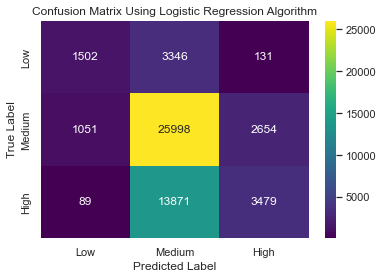

Train F1 Score (Micro) for Logistic Regression Algorithm is : 0.591514773599386
Test F1 Score (Micro) for Logistic Regression Algorithm is : 0.5943669538189981


In [ ]:
model_1 = LogisticRegression()
model_1.fit(X_train, y_train)
pred_1 = model_1.predict(X_test)
train_pred_1 = model_1.predict(X_train)

print(classification_report(y_test, pred_1))
make_confusion_matrix(pred_1, 'Logistic Regression')
train_score_1 = f1_score(y_train, train_pred_1, average='micro')
score_1 = f1_score(y_test, pred_1, average='micro')
print('Train F1 Score (Micro) for Logistic Regression Algorithm is : {}'.format(train_score_1))
print('Test F1 Score (Micro) for Logistic Regression Algorithm is : {}'.format(score_1))

## **Decision Tree**

              precision    recall  f1-score   support

           1       0.48      0.52      0.50      4979
           2       0.71      0.71      0.71     29703
           3       0.62      0.61      0.62     17439

    accuracy                           0.66     52121
   macro avg       0.61      0.61      0.61     52121
weighted avg       0.66      0.66      0.66     52121



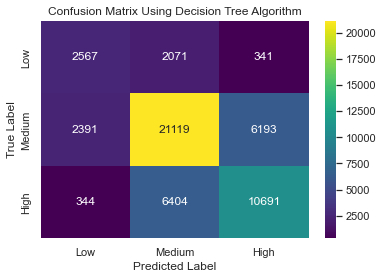

Train F1 Score (Micro) for Decision Tree Algorithm is : 0.9864207597851112
Test F1 Score (Micro) for Decision Tree Algorithm is : 0.6595614051917653


In [ ]:
model_2 = DecisionTreeClassifier()
model_2.fit(X_train, y_train)
pred_2 = model_2.predict(X_test)
train_pred_2 = model_2.predict(X_train)

print(classification_report(y_test, pred_2))
make_confusion_matrix(pred_2, 'Decision Tree')
train_score_2 = f1_score(y_train, train_pred_2, average='micro')
score_2 = f1_score(y_test, pred_2, average='micro')
print('Train F1 Score (Micro) for Decision Tree Algorithm is : {}'.format(train_score_2))
print('Test F1 Score (Micro) for Decision Tree Algorithm is : {}'.format(score_2))

## **K-Nearest Neighbors**

              precision    recall  f1-score   support

           1       0.52      0.46      0.49      4979
           2       0.69      0.75      0.72     29703
           3       0.63      0.56      0.59     17439

    accuracy                           0.66     52121
   macro avg       0.61      0.59      0.60     52121
weighted avg       0.65      0.66      0.66     52121



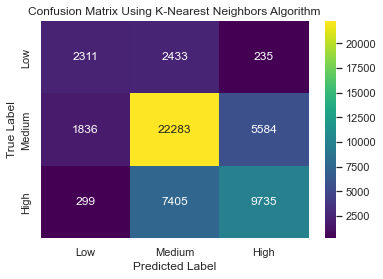

Train F1 Score (Micro) for K-Nearest Neighbors Algorithm is : 0.7662125863392172
Test F1 Score (Micro) for K-Nearest Neighbors Algorithm is : 0.65864047121122


In [ ]:
model_3 = KNeighborsClassifier()
model_3.fit(X_train, y_train)
pred_3 = model_3.predict(X_test)
train_pred_3 = model_3.predict(X_train)

print(classification_report(y_test, pred_3))
make_confusion_matrix(pred_3, 'K-Nearest Neighbors')
train_score_3 = f1_score(y_train, train_pred_3, average='micro')
score_3 = f1_score(y_test, pred_3, average='micro')
print('Train F1 Score (Micro) for K-Nearest Neighbors Algorithm is : {}'.format(train_score_3))
print('Test F1 Score (Micro) for K-Nearest Neighbors Algorithm is : {}'.format(score_3))

## **Linear Discriminant Analysis**

              precision    recall  f1-score   support

           1       0.49      0.50      0.50      4979
           2       0.60      0.85      0.70     29703
           3       0.57      0.18      0.27     17439

    accuracy                           0.59     52121
   macro avg       0.55      0.51      0.49     52121
weighted avg       0.58      0.59      0.54     52121



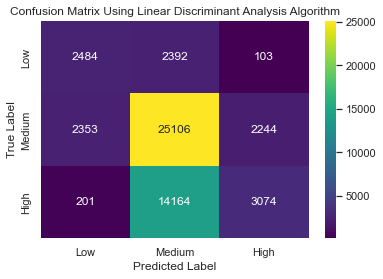

Train F1 Score (Micro) for Linear Discriminant Analysis Algorithm is : 0.587212202609363
Test F1 Score (Micro) for Linear Discriminant Analysis Algorithm is : 0.5883233245716698


In [ ]:
model_4 = LinearDiscriminantAnalysis()
model_4.fit(X_train, y_train)
pred_4 = model_4.predict(X_test)
train_pred_4 = model_4.predict(X_train)

print(classification_report(y_test, pred_4))
make_confusion_matrix(pred_4, 'Linear Discriminant Analysis')
train_score_4 = f1_score(y_train, train_pred_4, average='micro')
score_4 = f1_score(y_test, pred_4, average='micro')
print('Train F1 Score (Micro) for Linear Discriminant Analysis Algorithm is : {}'.format(train_score_4))
print('Test F1 Score (Micro) for Linear Discriminant Analysis Algorithm is : {}'.format(score_4))

## **Naive Bayes**

              precision    recall  f1-score   support

           1       0.39      0.52      0.45      4979
           2       0.66      0.15      0.25     29703
           3       0.40      0.88      0.55     17439

    accuracy                           0.43     52121
   macro avg       0.49      0.52      0.42     52121
weighted avg       0.55      0.43      0.37     52121



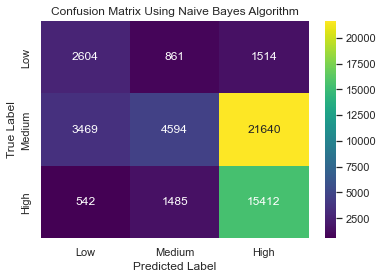

Train F1 Score (Micro) for Naive Bayes Algorithm is : 0.43118284727551803
Test F1 Score (Micro) for Naive Bayes Algorithm is : 0.4337982770860114


In [ ]:
model_5 = GaussianNB()
model_5.fit(X_train, y_train)
pred_5 = model_5.predict(X_test)
train_pred_5 = model_5.predict(X_train)

print(classification_report(y_test, pred_5))
make_confusion_matrix(pred_5, 'Naive Bayes')
train_score_5 = f1_score(y_train, train_pred_5, average='micro')
score_5 = f1_score(y_test, pred_5, average='micro')
print('Train F1 Score (Micro) for Naive Bayes Algorithm is : {}'.format(train_score_5))
print('Test F1 Score (Micro) for Naive Bayes Algorithm is : {}'.format(score_5))

## **Extreme Gradient Boosting**

              precision    recall  f1-score   support

           1       0.69      0.45      0.54      4979
           2       0.72      0.86      0.78     29703
           3       0.75      0.58      0.66     17439

    accuracy                           0.73     52121
   macro avg       0.72      0.63      0.66     52121
weighted avg       0.73      0.73      0.72     52121



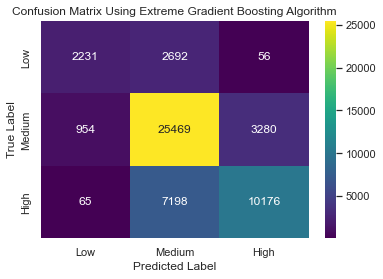

Train F1 Score (Micro) for Extreme Gradient Boosting Algorithm is : 0.7448196469685342
Test F1 Score (Micro) for Extreme Gradient Boosting Algorithm is : 0.7266936551485965


In [ ]:
model_6 = XGBClassifier(verbosity=0)
model_6.fit(X_train, y_train)
pred_6 = model_6.predict(X_test)
train_pred_6 = model_6.predict(X_train)

print(classification_report(y_test, pred_6))
make_confusion_matrix(pred_6, 'Extreme Gradient Boosting')
train_score_6 = f1_score(y_train, train_pred_6, average='micro')
score_6 = f1_score(y_test, pred_6, average='micro')
print('Train F1 Score (Micro) for Extreme Gradient Boosting Algorithm is : {}'.format(train_score_6))
print('Test F1 Score (Micro) for Extreme Gradient Boosting Algorithm is : {}'.format(score_6))

## **Random Forest**

              precision    recall  f1-score   support

           1       0.64      0.47      0.54      4979
           2       0.72      0.83      0.77     29703
           3       0.72      0.59      0.65     17439

    accuracy                           0.71     52121
   macro avg       0.69      0.63      0.65     52121
weighted avg       0.71      0.71      0.71     52121



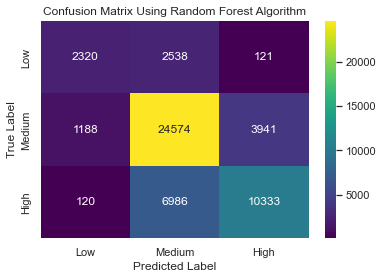

Train F1 Score (Micro) for Random Forest Algorithm is : 0.9864111665387567
Test F1 Score (Micro) for Random Forest Algorithm is : 0.7142418602866407


In [ ]:
model_7 = RandomForestClassifier(random_state=0)
model_7.fit(X_train, y_train)
pred_7 = model_7.predict(X_test)
train_pred_7 = model_7.predict(X_train)

print(classification_report(y_test, pred_7))
make_confusion_matrix(pred_7, 'Random Forest')
train_score_7 = f1_score(y_train, train_pred_7, average='micro')
score_7 = f1_score(y_test, pred_7, average='micro')
print('Train F1 Score (Micro) for Random Forest Algorithm is : {}'.format(train_score_7))
print('Test F1 Score (Micro) for Random Forest Algorithm is : {}'.format(score_7))

## **Comparing Algorithm**

In [ ]:
names = ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors', 'Linear Discriminant Analysis',
         'Naive Bayes', 'Extreme Gradient Boosting', 'Random Forest']
cv_score_f1 = [result_1, result_2, result_3, result_4, result_5, result_6, result_7]
train_score_f1 = [train_score_1, train_score_2, train_score_3, train_score_4, train_score_5, train_score_6, train_score_7]
score_f1 = [score_1, score_2, score_3, score_4, score_5, score_6, score_7]

In [ ]:
compare = pd.DataFrame()
compare['Algorithm'] = names
compare['CV F1 Score'] = cv_score_f1
compare['F1 Score (Train)'] = train_score_f1
compare['F1 Score (Test)'] = score_f1
compare

Algorithm  CV F1 Score  F1 Score (Train)  \
0           Logistic Regression     0.591088          0.591515   
1                 Decision Tree     0.657603          0.986421   
2           K-Nearest Neighbors     0.655962          0.766213   
3  Linear Discriminant Analysis     0.586766          0.587212   
4                   Naive Bayes     0.430962          0.431183   
5     Extreme Gradient Boosting     0.727283          0.744820   
6                 Random Forest     0.714558          0.986411   

   F1 Score (Test)  
0         0.594367  
1         0.659561  
2         0.658640  
3         0.588323  
4         0.433798  
5         0.726694  
6         0.714242

Menggunakan 7 buah algoritma *Machine Learning* dengan random_state = 0, kita melihat bahwa *Random Forest Algorithm* dan *Extreme Gradient Boosting* adalah 2 algoritma yang memberikan nilai F1 Score tertinggi saat diuji di data *test* (*Valudation Data*).

## **Hyperparameter Tuning**

Pada bagian sebelumnya, diperoleh 2 buah algoritma yang menghasilkan nilai F1 Score tertinggi yaitu Extreme *Gradient Boosting* dan *Random Forest*. Oleh karena itu, kita akan melakukan proses *Hyperparameter Tuning* pada dua algoritma tersebut. Proses *hyperparameter tuning* dapat melakukan GridSearchCV atau RandomizedCV. Pada permasalahan kali ini, kita akan menggunakan RandomizedCV.

**RandomizedCV**

**Extreme Gradient Boosting Parameter Tuning**

In [ ]:
xgb_params = {'n_estimators':range(50, 201, 50),
              'max_depth': range(3, 15)}
xgb_model = XGBClassifier(tree_method="gpu_hist", verbosity=0)
kfold = KFold(n_splits=4)
rscv_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=xgb_params, n_iter=5,
                              scoring='f1_micro', cv=kfold, random_state=0, n_jobs=-1)

rscv_xgb.fit(X,y)
print("Optimal hyperparameter combination for XGBClassifier:", rscv_xgb.best_params_)
print()
print("Mean cross-validated training accuracy score:", rscv_xgb.best_score_)

Optimal hyperparameter combination for XGBClassifier: {'n_estimators': 150, 'max_depth': 10}

Mean cross-validated training accuracy score: 0.7340455365552411


**Random Forest Parameter Tuning**

In [ ]:
params = {'n_estimators': range(50, 251, 50),
          'max_depth': range(15, 30),
          'max_features': ['sqrt', 'log2', None]}

rf_model = RandomForestClassifier(random_state=0)
kfold = KFold(n_splits=4)
rscv_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=params, n_iter=5, 
                             scoring='f1_micro', cv=kfold, random_state=0, n_jobs=-1)

rscv_rf.fit(X,y)
print("Optimal hyperparameter combination for RandomForestClassifier:", rscv_rf.best_params_)
print()
print("Mean cross-validated training accuracy score:", rscv_rf.best_score_)

Optimal hyperparameter combination for RandomForestClassifier: {'n_estimators': 100, 'max_features': None, 'max_depth': 21}

Mean cross-validated training accuracy score: 0.7339687866382028


## **Build Model with Parameter Tuning**

**Extreme Gradient Boosting**

In [ ]:
tuning_xgb_model = XGBClassifier(n_estimators=150, max_depth=10, verbosity=0, tree_method="gpu_hist")
tuning_xgb_model.fit(X_train,y_train)
pred_xgb = tuning_xgb_model.predict(X_test)
train_pred_xgb = tuning_xgb_model.predict(X_train)
print('F1 Score (Micro) on Training Data :', f1_score(y_train, train_pred_xgb, average='micro'))
print('F1 Score (Micro) on Testing Data :', f1_score(y_test, pred_xgb, average='micro'))

F1 Score (Micro) on Training Data : 0.7942680353031466
F1 Score (Micro) on Testing Data : 0.7356343892097237


**Random Forest**

In [ ]:
tuning_rf_model = RandomForestClassifier(n_estimators=100, max_features=None, max_depth=21, random_state=0)
tuning_rf_model.fit(X_train,y_train)
pred_rf = tuning_rf_model.predict(X_test)
train_pred_rf = tuning_rf_model.predict(X_train)
print('F1 Score (Micro) on Training Data :', f1_score(y_train, train_pred_rf, average='micro'))
print('F1 Score (Micro) on Testing Data :', f1_score(y_test, pred_rf, average='micro'))

F1 Score (Micro) on Training Data : 0.8994675748273215
F1 Score (Micro) on Testing Data : 0.7350204332226934


## **Feature Importance of Both Model**

**Extreme Gradient Boosting**

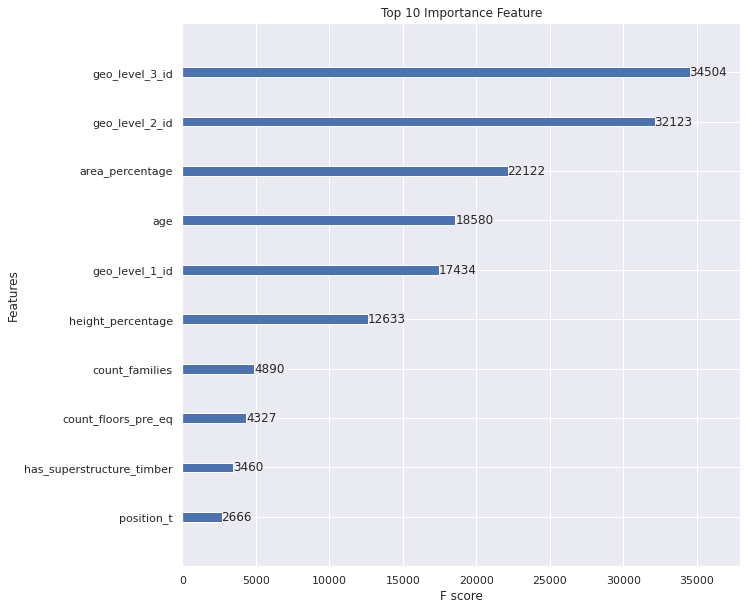

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
plot_importance(tuning_xgb_model, max_num_features=10, ax=ax)
plt.title('Top 10 Importance Feature')
plt.show()

Menggunakan *Extreme Gradient Boosting*, diperoleh 10 *feature* terpenting dalam model yaitu `geo_level_3_id`, `geo_level_2_id`, `area_percentage`, `age`, `geo_level_1_id`, `height_percentage`, `count_families`, `count_floors_pre_eq`, `has_superstructure_timber`, `position_t`. 

**Random Forest**

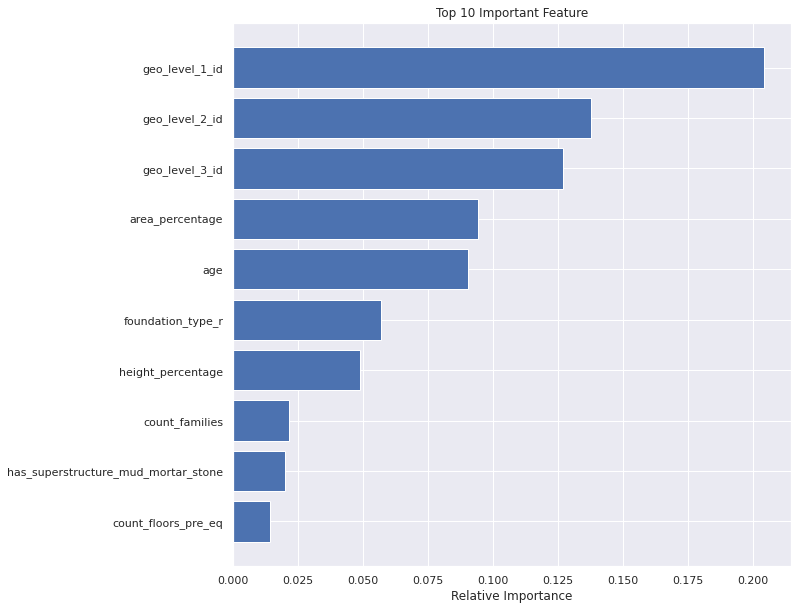

In [ ]:
features = X.columns
importances = tuning_rf_model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices[-10:])), importances[indices][-10:], color='b', align='center')
plt.yticks(range(len(indices[-10:])), features[indices][-10:])
plt.xlabel('Relative Importance')
plt.title('Top 10 Important Feature')
plt.show()

Menggunakan *Random Forest*, diperoleh 10 *feature* terpenting dalam model yaitu `geo_level_1_id`, `geo_level_2_id`, `geo_level_3_id``area_percentage`, `age`, `foundation_type_r`, `height_percentage`, `count_families`, `has_superstructure_mud_mortar_stone`, `count_floors_pre_eq`.

## **Final Model**

Setelah dilakukan proses parameter tuning untuk *Extreme Gradient Boosting* dan *Random Forest*, diperoleh nilai F1 score untuk kedua model pada *training data* dan *validation data*. Terlihat untuk model pada *Extreme Gradient Boosting* lebih stabil karena nilai F1 score pada *training data* dan *validation data* berada di rentang 79.4% dan 73.5%. Sementara pada model *Random Forest*, nilai F1 score pada *training data* adalah 89.9% dan 73.5% pada *validation data*. Sehingga pada model akhir, kita akan menggunakan *Extreme Gradient Boosting* untuk memprediksi *test data*.

In [ ]:
def final_confusion_matrix(pred, title):
    cam = confusion_matrix(y, pred)
    sns.heatmap(cam, annot=True, cmap='viridis', 
                xticklabels=['Low', 'Medium', 'High'],
                yticklabels=['Low', 'Medium', 'High'],
                fmt="d")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix Using {} Algorithm'.format(title))
    plt.show()

In [ ]:
scaler_final = StandardScaler()
scaled_col = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 
              'count_floors_pre_eq', 'age', 'area_percentage', 
              'height_percentage']
X[scaled_col] = scaler_final.fit_transform(X[scaled_col])

F1 Score (Micro) on Training Data : 0.7867276027336809
Classification report: 
               precision    recall  f1-score   support

           1       0.83      0.60      0.70     25124
           2       0.77      0.89      0.83    148259
           3       0.81      0.66      0.73     87218

    accuracy                           0.79    260601
   macro avg       0.80      0.72      0.75    260601
weighted avg       0.79      0.79      0.78    260601



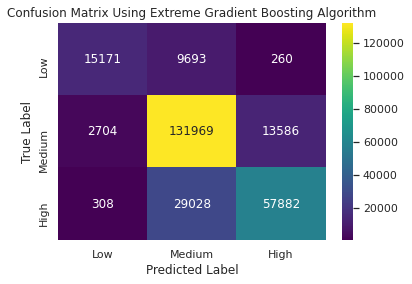

In [ ]:
final_model = XGBClassifier(n_estimators=150, max_depth=10, verbosity=0, tree_method="gpu_hist")
final_model.fit(X, y)
pred_final_model = final_model.predict(X)
print('F1 Score (Micro) on Training Data :', f1_score(y, pred_final_model, average='micro'))
print('Classification report: \n',classification_report(y, pred_final_model))
final_confusion_matrix(pred_final_model, 'Extreme Gradient Boosting')

## **Predict Unseen Data**

In [ ]:
X.head()

geo_level_1_id  ...  plan_configuration_a
building_id                  ...                      
802906                    6  ...                     0
28830                     8  ...                     0
94947                    21  ...                     0
590882                   22  ...                     0
201944                   11  ...                     0

[5 rows x 54 columns]

In [ ]:
test_data = test_value.copy()
test_data = test_data.set_index('building_id')
test_data.head()

geo_level_1_id  ...  has_secondary_use_other
building_id                  ...                         
300051                   17  ...                        0
99355                     6  ...                        0
890251                   22  ...                        0
745817                   26  ...                        0
421793                   17  ...                        0

[5 rows x 38 columns]

In [ ]:
test_data_num = test_data.select_dtypes(include=['int64', 'float64'])
test_data_cat = test_data.select_dtypes(include=['object'])

In [ ]:
test_data_num = test_data_num.drop('has_secondary_use_agriculture', axis=1)

In [ ]:
test_data_cat = pd.get_dummies(test_data_cat)

In [ ]:
new_test_data = pd.concat([test_data_num, test_data_cat], axis=1)

In [ ]:
scaler = StandardScaler()
scaled_test = new_test_data.copy()
data_train = df_new.copy()
scaled_col = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 
              'count_floors_pre_eq', 'age', 'area_percentage', 
              'height_percentage']

scaled_train = data_train[scaled_col]
scaler.fit(scaled_train)
feature_scaled_test = scaled_test[scaled_col]
feature_scaled_test = scaler.transform(feature_scaled_test)
scaled_test[scaled_col] = feature_scaled_test
data_test = scaled_test.copy()

In [ ]:
data_test.head()

geo_level_1_id  ...  legal_ownership_status_w
building_id                  ...                          
300051             0.385835  ...                         0
99355             -0.983414  ...                         0
890251             1.008221  ...                         0
745817             1.506130  ...                         0
421793             0.385835  ...                         0

[5 rows x 67 columns]

In [ ]:
testing = data_test[list(df_num.drop('damage_grade', axis=1).columns)+list(chi2_greater100.index)]

In [ ]:
pred_testing_data = final_model.predict(testing)

In [ ]:
final = pd.DataFrame()
final['building_id'] = testing.index
final['damage_grade'] = pred_testing_data

In [ ]:
final

building_id  damage_grade
0           300051             3
1            99355             2
2           890251             2
3           745817             1
4           421793             3
...            ...           ...
86863       310028             2
86864       663567             2
86865      1049160             2
86866       442785             2
86867       501372             1

[86868 rows x 2 columns]

In [ ]:
final.to_csv('Damage Grade Prediction.csv', index=False)

## **Conclusion**

Berdasarkan proses yang telah dilakukan, dapat diperoleh beberapa kesimpulan yang dapat menajwab permasalahan sebelumnya. Kesimpulan ini diharapkan dapat menjawab permasalahan yang telah didefinisikan sebelumnya.

1. Mendapatkan gambaran bagaimana kerusakan yang ada pada bangunan yang ada di Nepal <br>
Jawab :  <br>
Setelah melakukan proses *Exploratory Data Analysis*, diperoleh rata-rata tingkat kerusakan yang ada sebesar **2,238272** yang menyatakan bangunan mengalami tingkat kerusakan menengah. Adapun lengkapnya adalah sebanyak **148259** bangunan mengalami tingkat kerusakan menengah, **87218** bangunan mengalami tingkat kerusakan tinggi, dan **25124** bangunan mengalami tingkat kerusakan rendah. Terlihat bahwa jumlah bangunan dengan tingkat kerusakan mengengah adalah yang paling banyak yaitu sebesar **56.89%** diikuti oleh bangunan dengan tingkat kerusakan tinggi sebesar **33.47%** dan terakhir bangunan dengan tingkat kerusakan rendah sebesar **9.64%**. Tingkatan level geografis yang semakin tinggi antara **`geo_level_1_id`**, **`geo_level_2_id`**, dan **`geo_level_3_id`** memberikan informasi bahwa semakin tinggi level geografis, tingkat kerusakan semakin sama.

2. Memberikan rekomendasi berupa material atau karakteristik spesifik yang dapat digunakan dalam membangun suatu bangunan untuk mengurangi dampak kerusakan yang ditimbulkan dari gempa bumi.  <br>
Jawab :  <br>
Diperoleh rekomendasi bangunan yang dinilai dapat meminimalisir dampak dari gempa bumi sebagai berikut.
    *  Bangunan yang menggunakan superstruktur ***Reinforce Concrete Engineered*** atau ***Cement Mortar Brick***
    *   Bangunan dengan jumlah lantai sebanyak **1** atau **3**
    *   Bangunan dengan tinggi ternormalisasi kurang dari **3** meter atau lebih dari **9** meter
    *   Bangunan dengan luas ternormalisasi kurang dari **4** meter persegi atau lebih dari **10** meter persegi.

3.  Memprediksi level kerusakan bangunan yang terkena dampak gempa bumi Nepal 2015.  <br>
Jawab :  <br>
Proses prediksi tingkat kerusakan yang disebabkan oleh gempa Nepal 2015 terhadap bangunan dapat kita prediksi menggunakan algoritma *Machine Learning*. Model dengan nilai *F1 Score* tertinggi dalam memprediksi tingkat kerusakan akibat gempa bumi terhadap bangunan adalah model algoritma ***Extreme Gradient Boosting*** menggunakan *XGBClassifier* dengan memasukkan parameter `n_estimators=150` dan `max_depth=10`. Menggunakan model ini diperoleh nilai *F1 Score* sebesar **73,56%**. Menggunakan model ini, dapat dilihat bahwa 10 *feature* terpenting dalam model yaitu **`geo_level_3_id`**, **`geo_level_2_id`**, **`area_percentage`**, **`age`**, **`geo_level_1_id`**, **`height_percentage`**, **`count_families`**, **`count_floors_pre_eq`**, **`has_superstructure_timber`**, **`position_t`**. Hal ini sesuai dengan keadaan dikarenakan `geo_level` yang mana adalah wilayah geografis tempat bangunan berada adalah salah satu faktor penting untuk memprediksi tingkat kerusakan bangunan akibat gempa. Untuk wilayah yang berada dengan pusat terjadinya gempa, bangunan yang berada pada wilayah tersebut akan lebih mudah mengalami kerusakan dibandingkan bangunan tidak. `area_percentage` dan `height_percentage` yang menyatakan luas dan tinggi bangunan juga merupakan faktor penting untuk memprediksi tingkat kerusakan akibat gempa. Terlihat bahwa `age` atau umur bangunan juga merupakan faktor penting untuk memprediksi tingkat kerusakan bangunan akibat gempa.